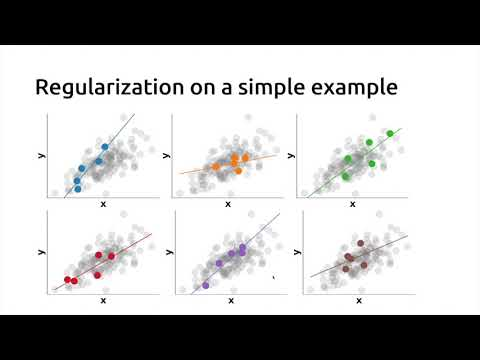

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('K64zB_5skls', width=800, height=300)

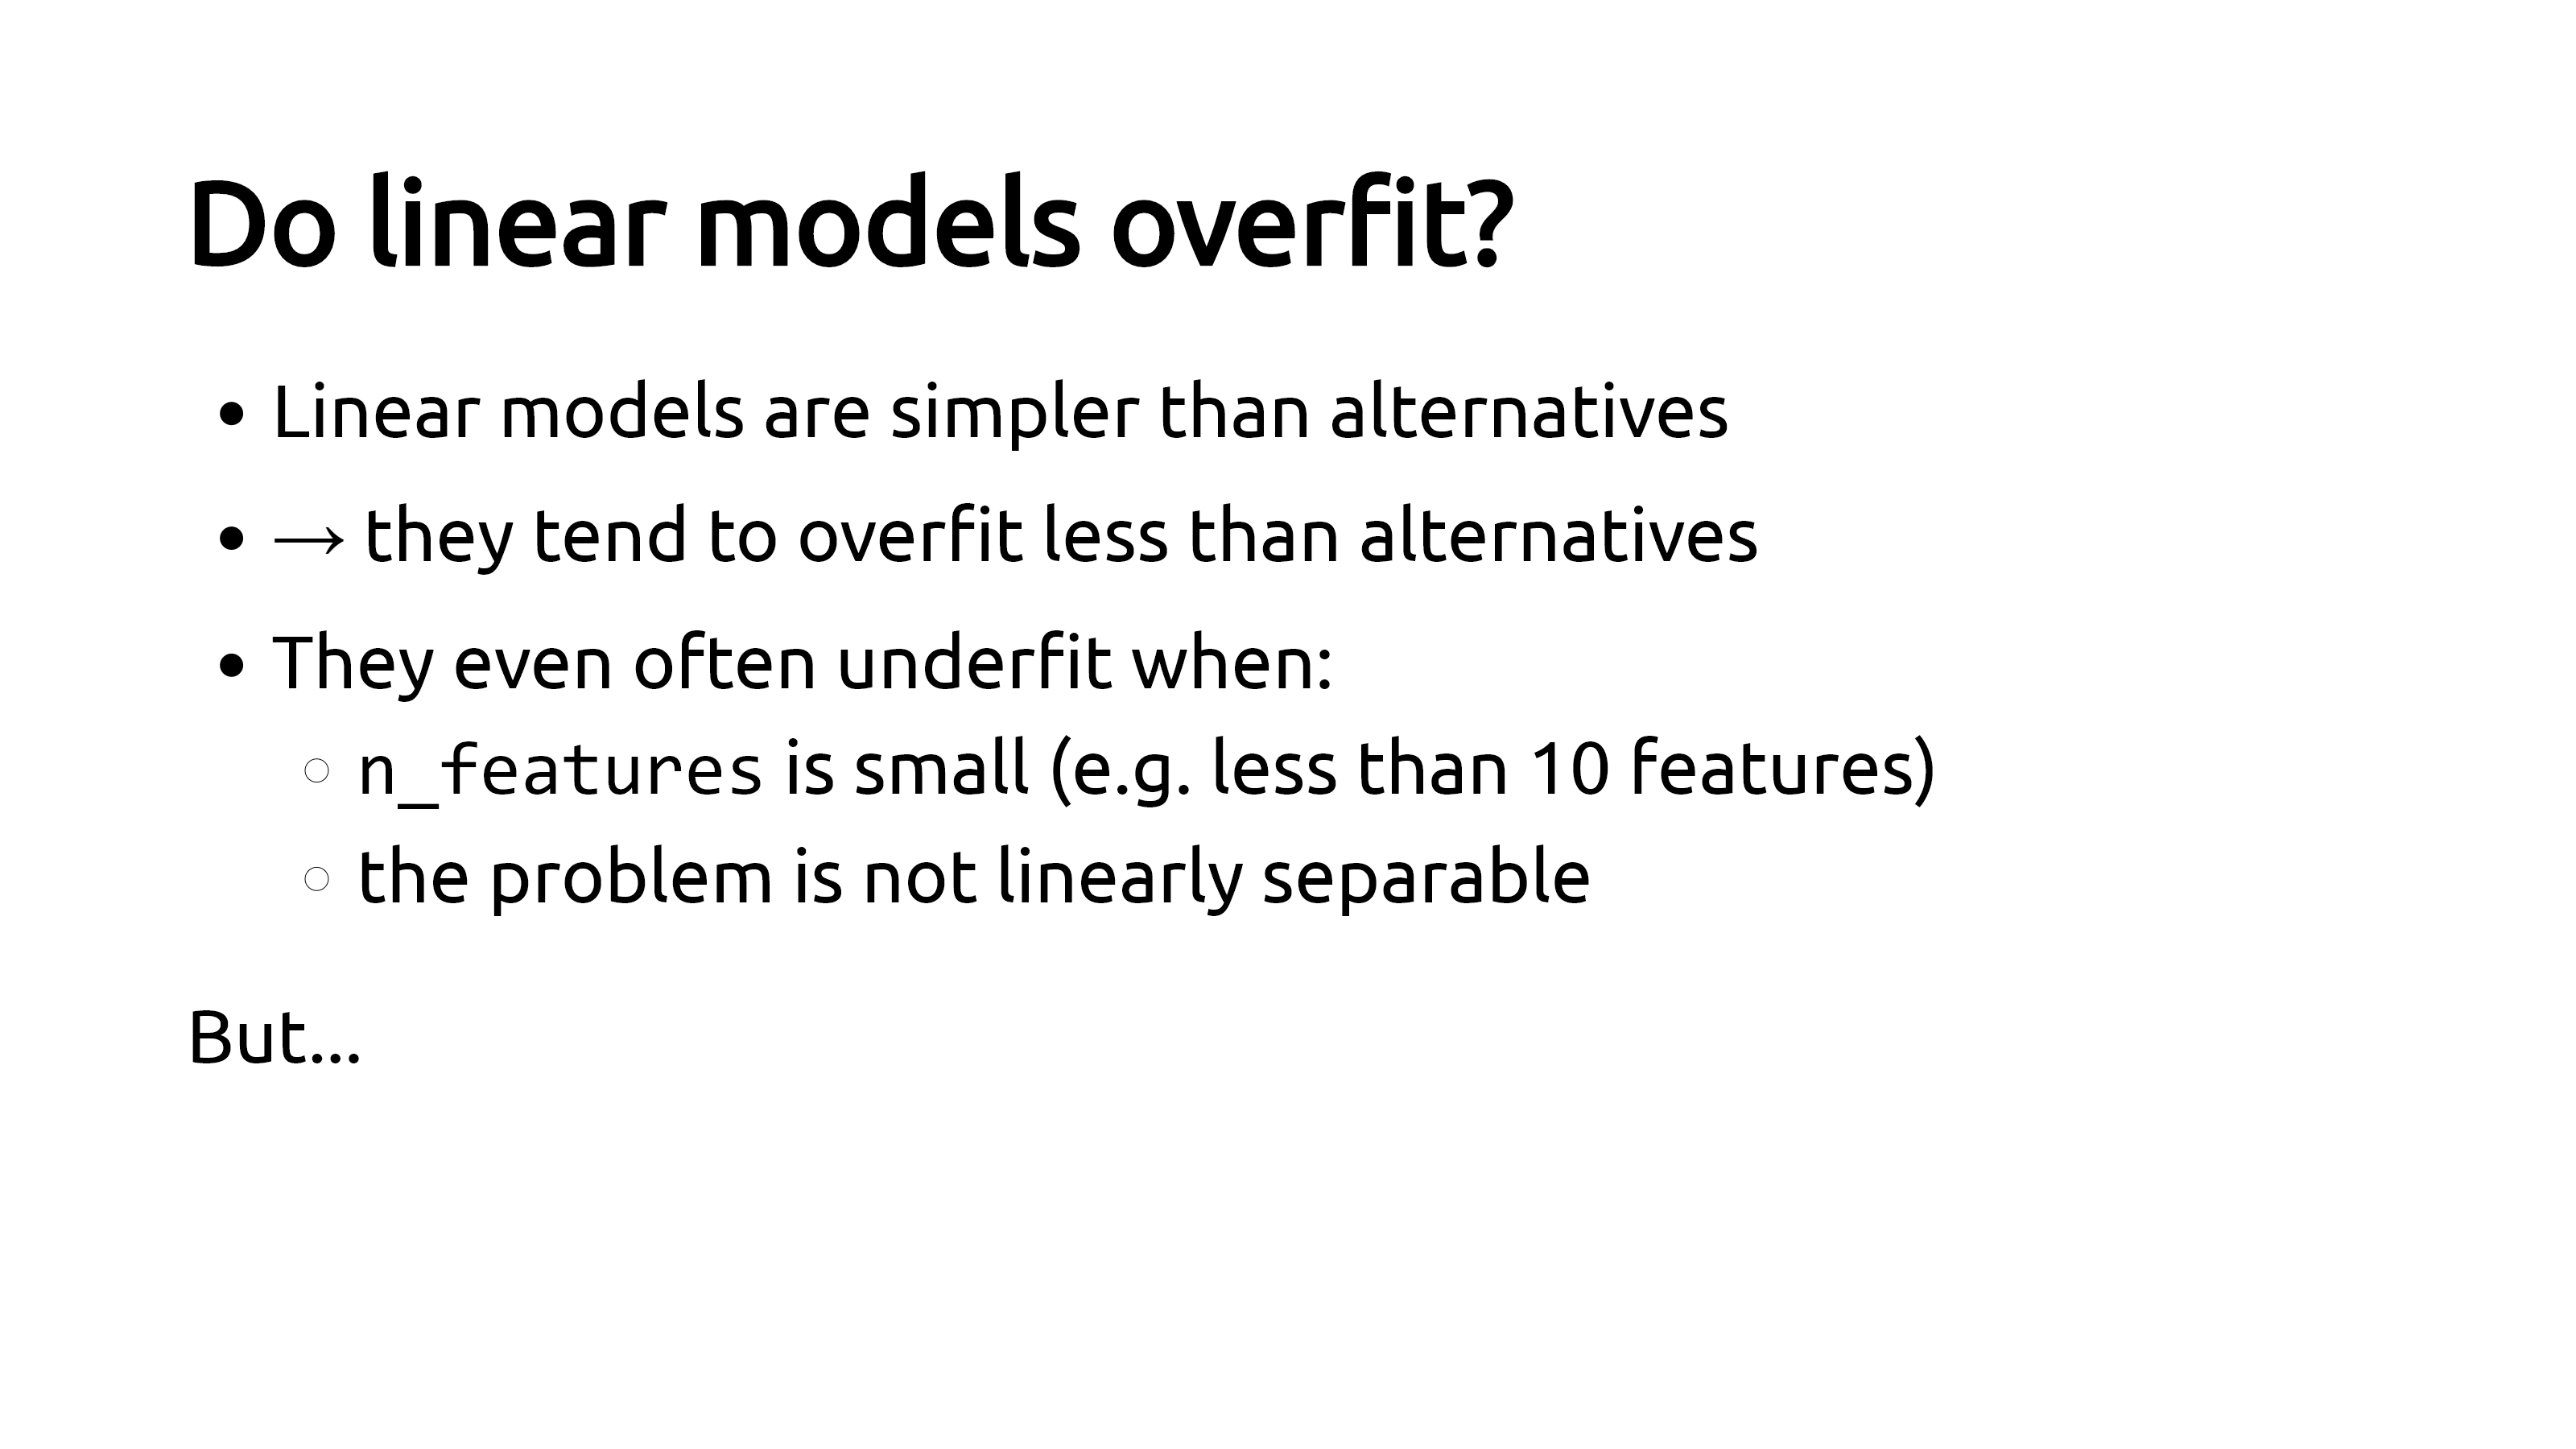

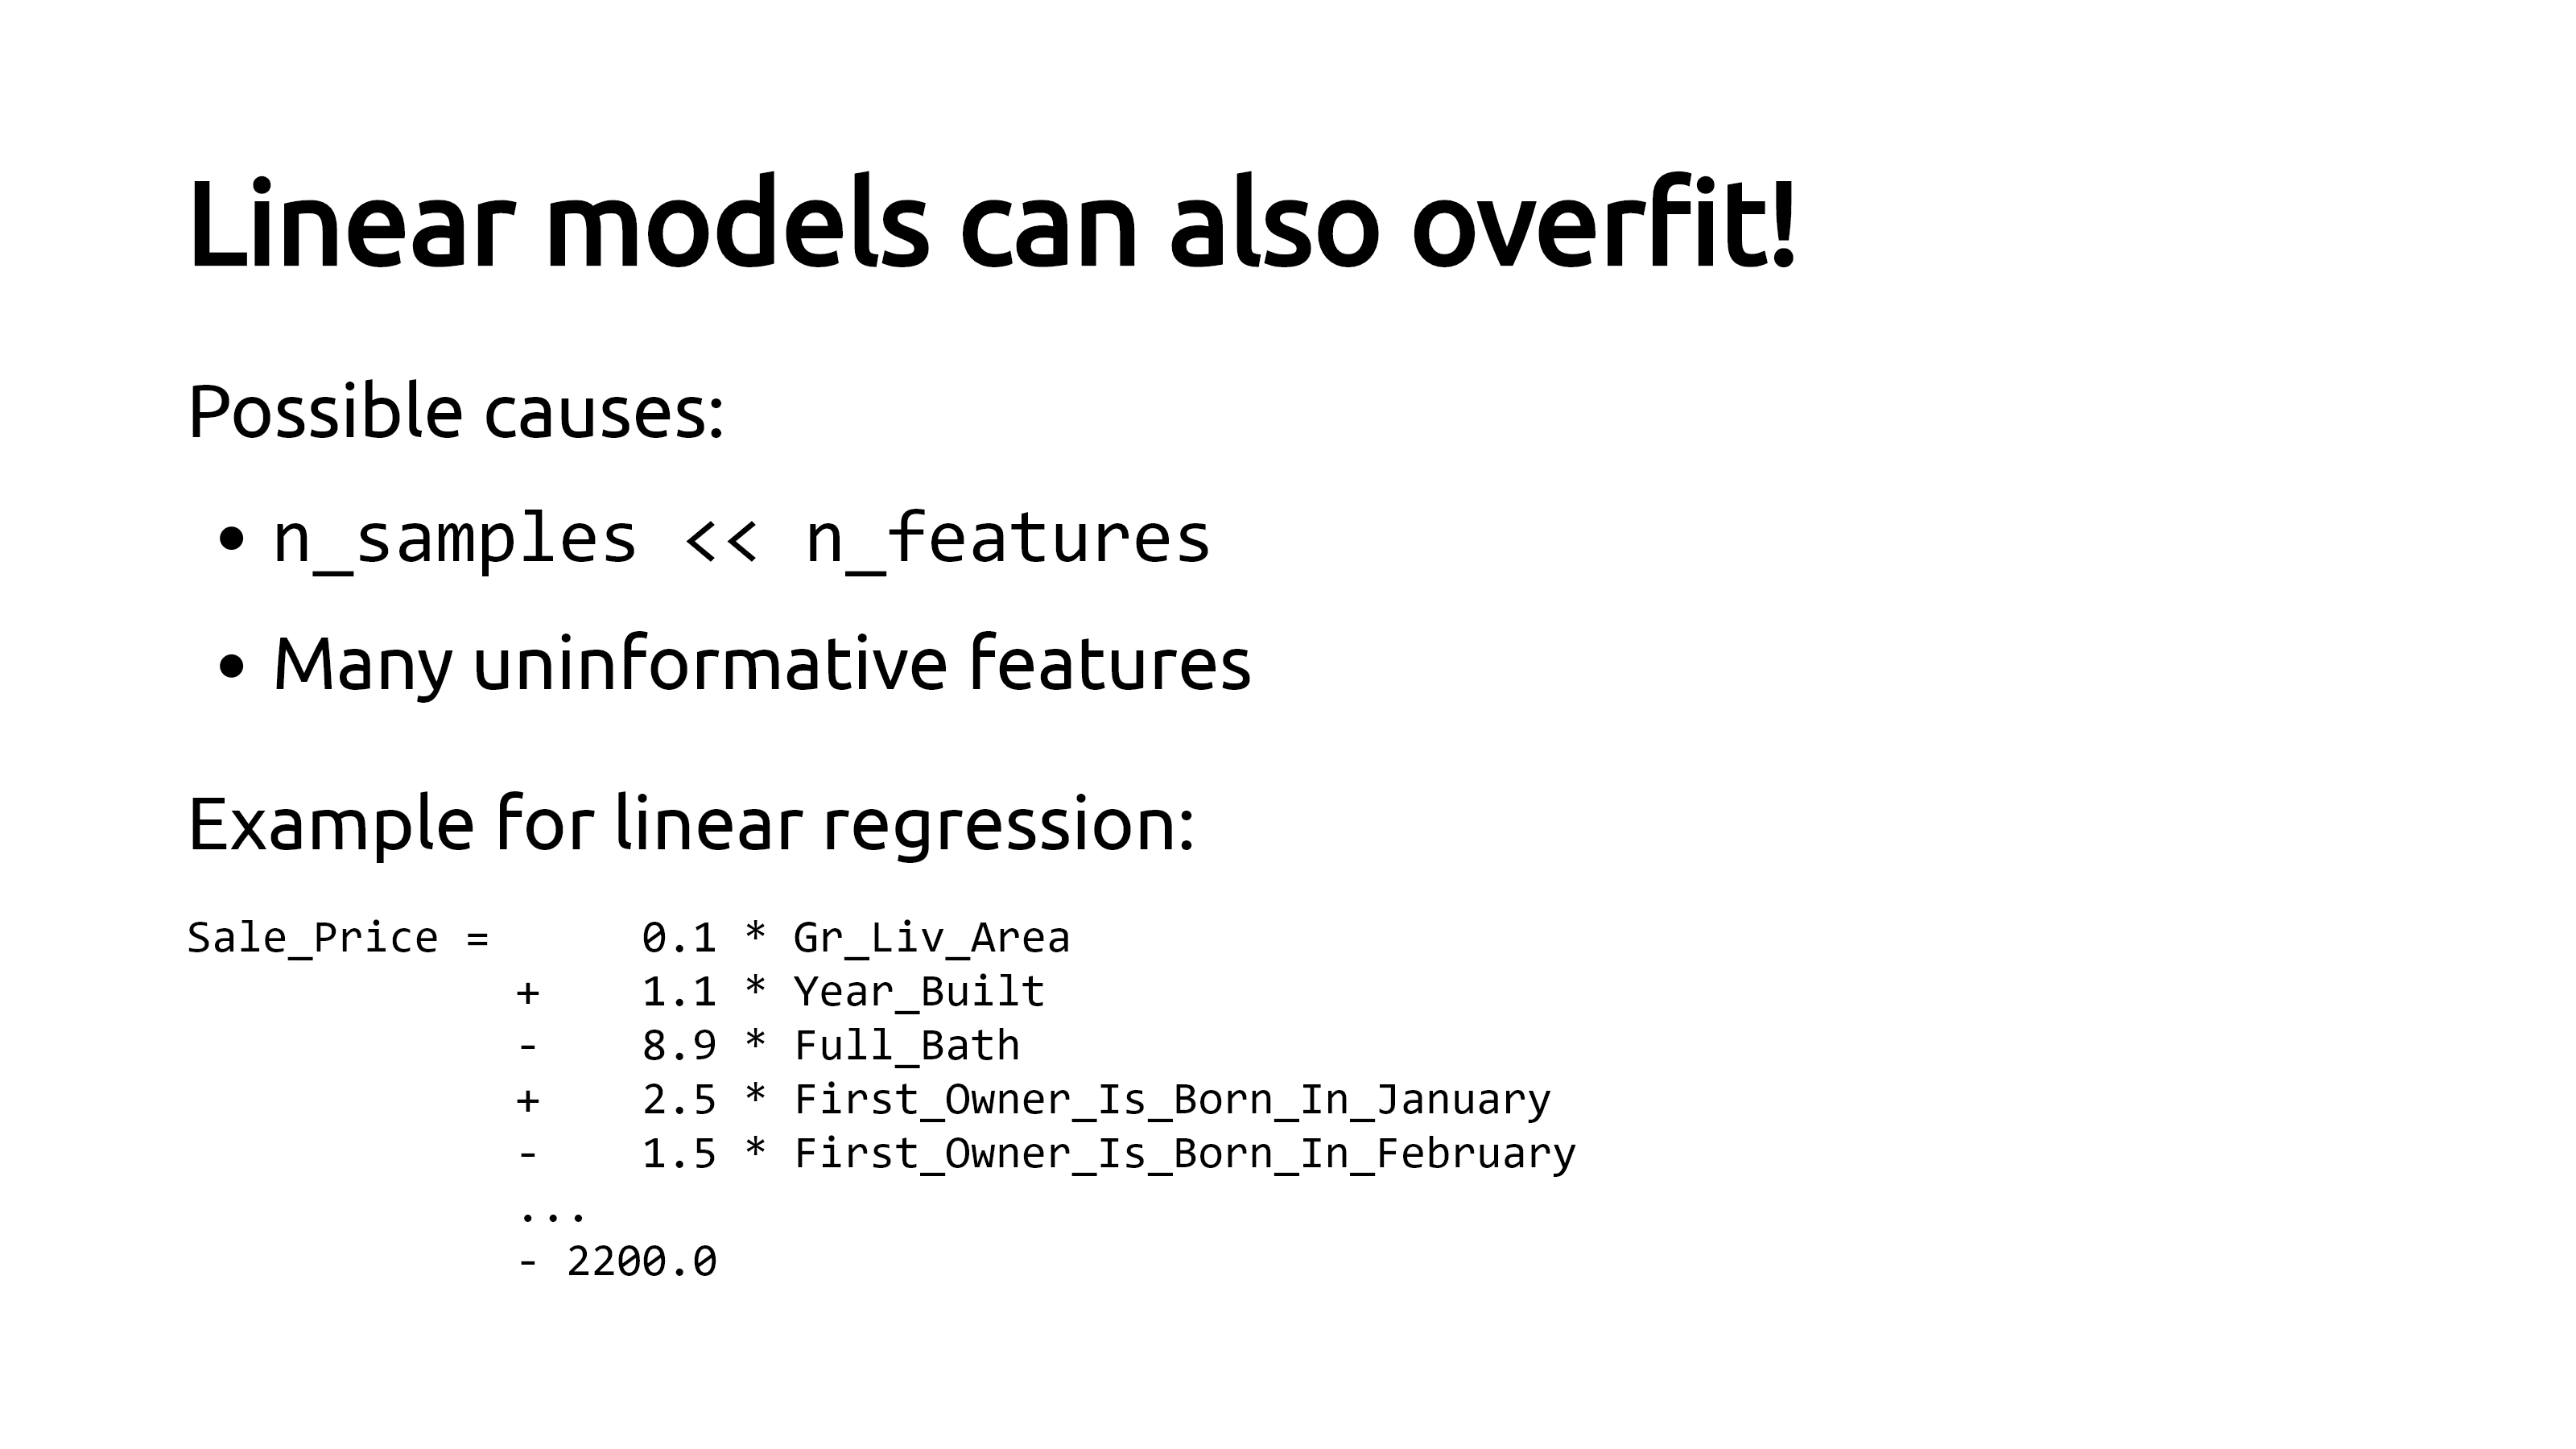

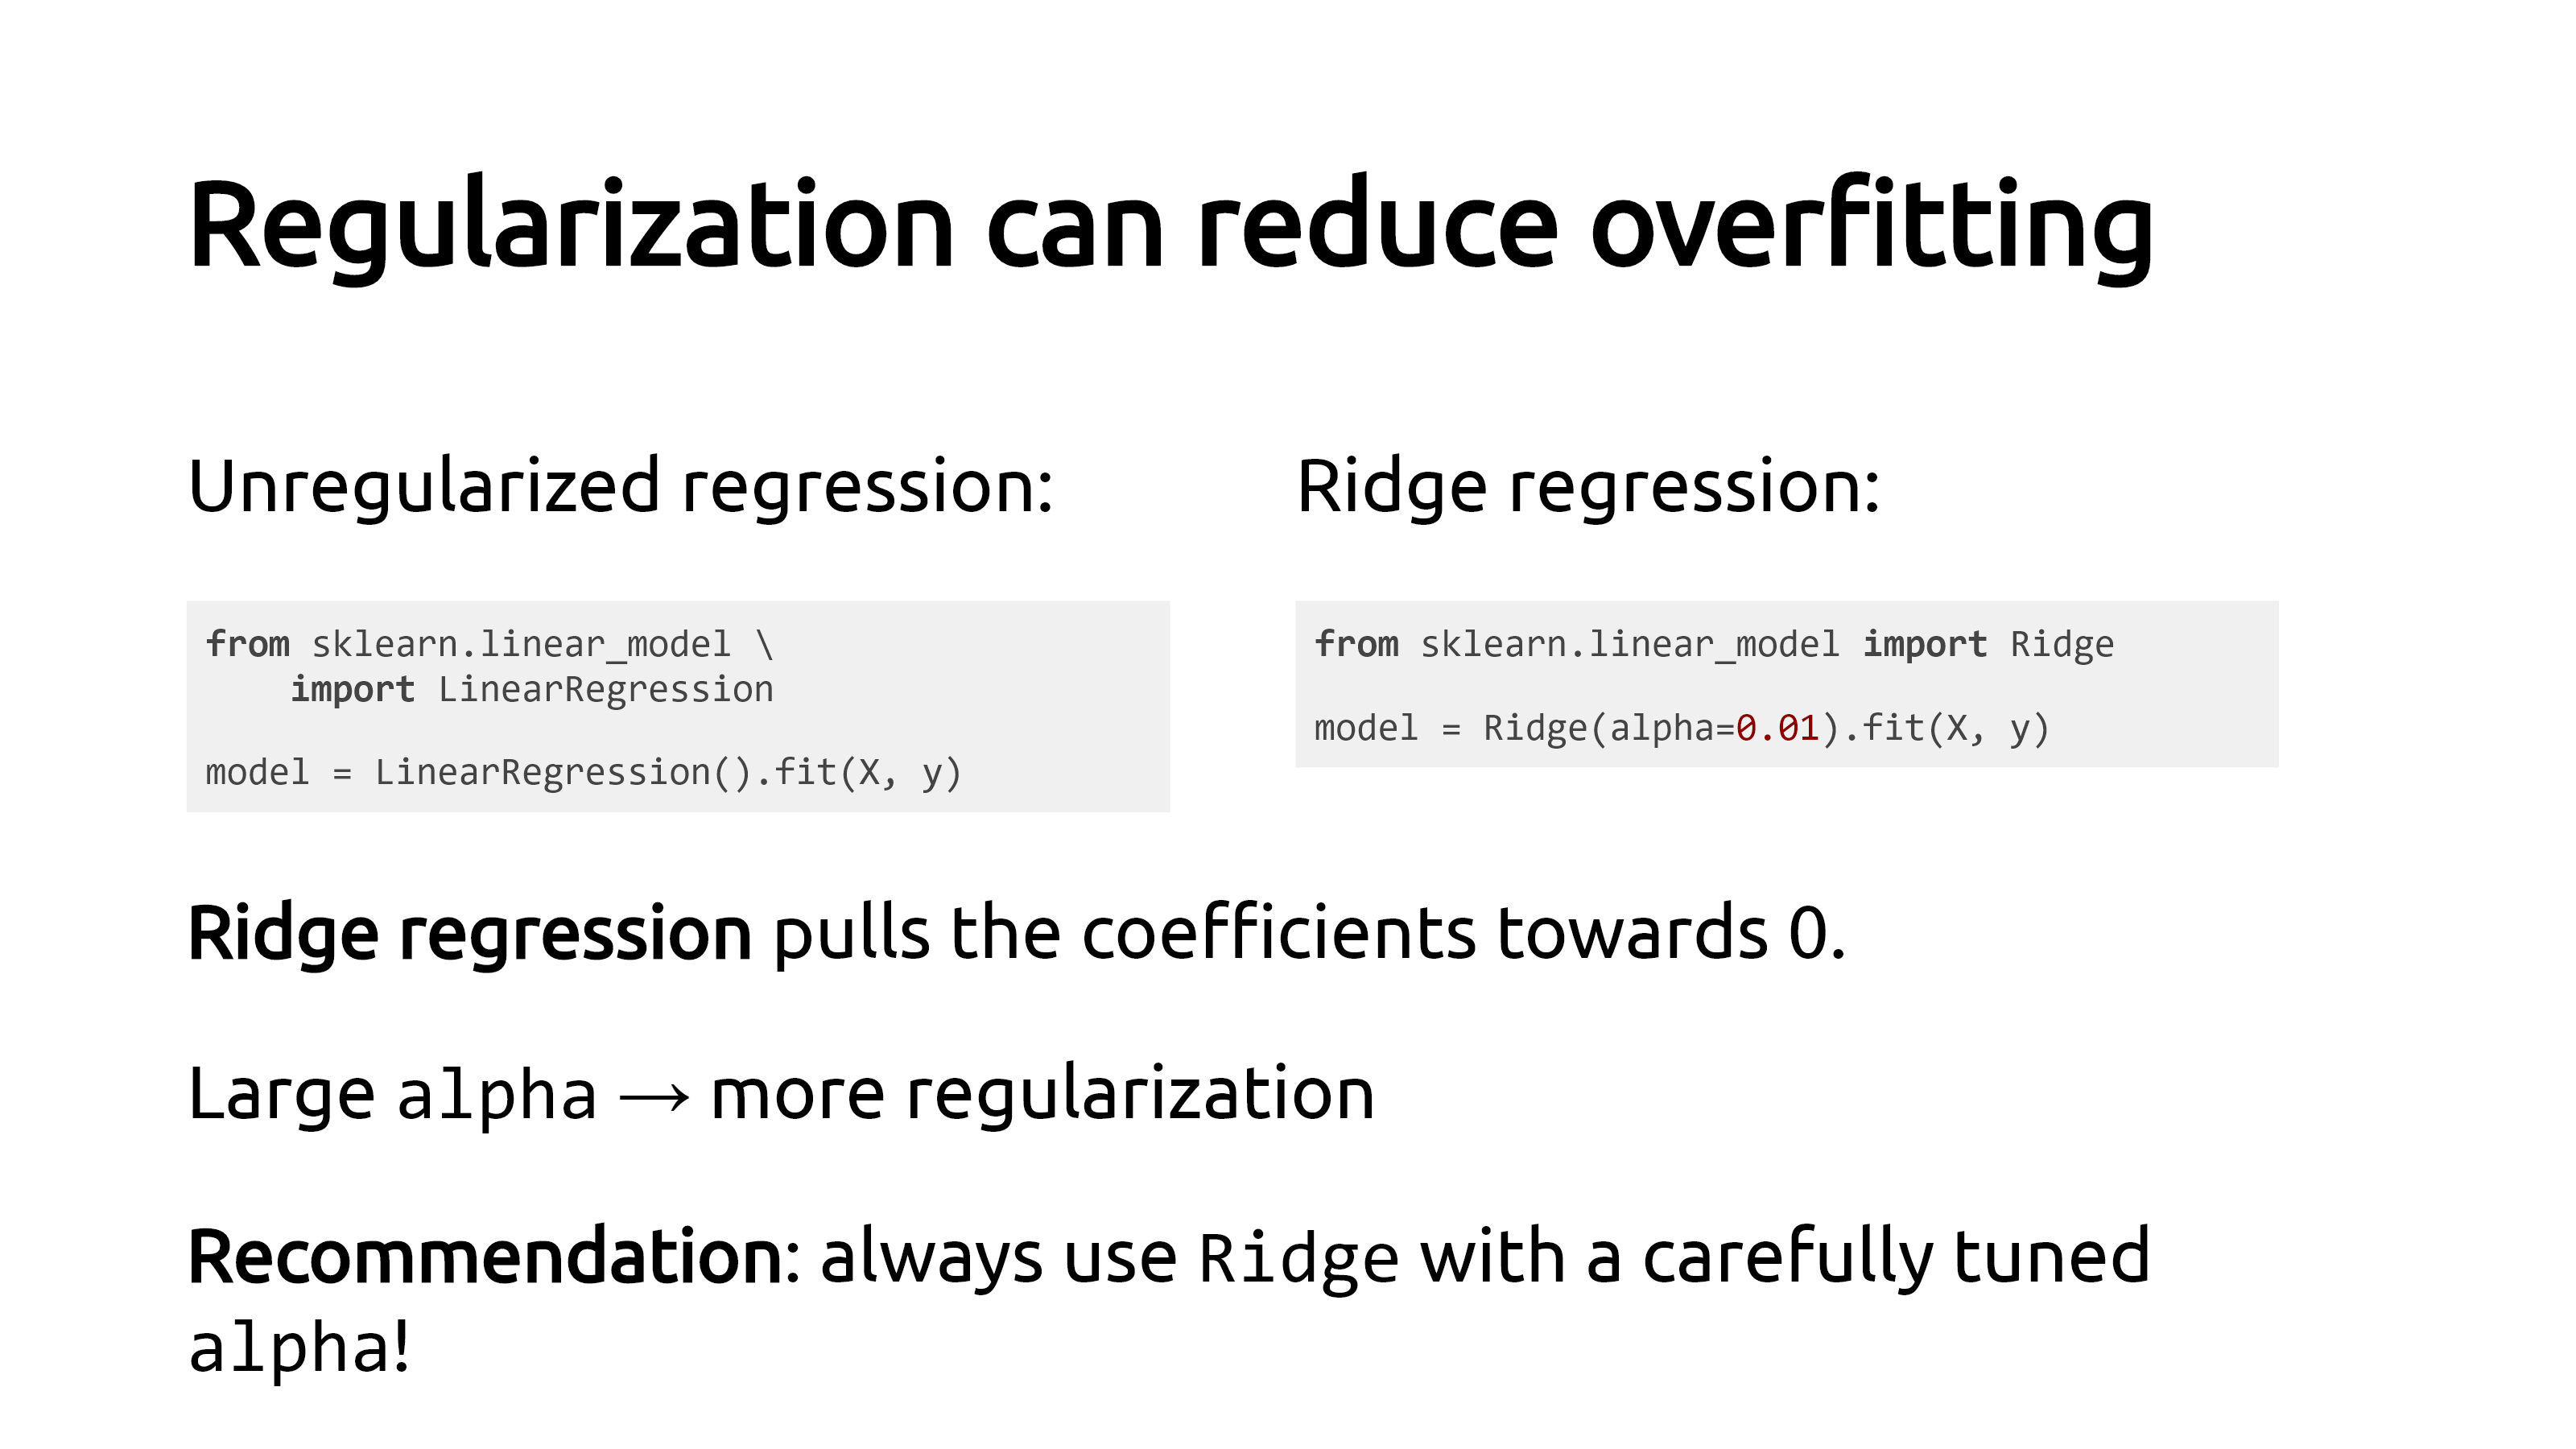

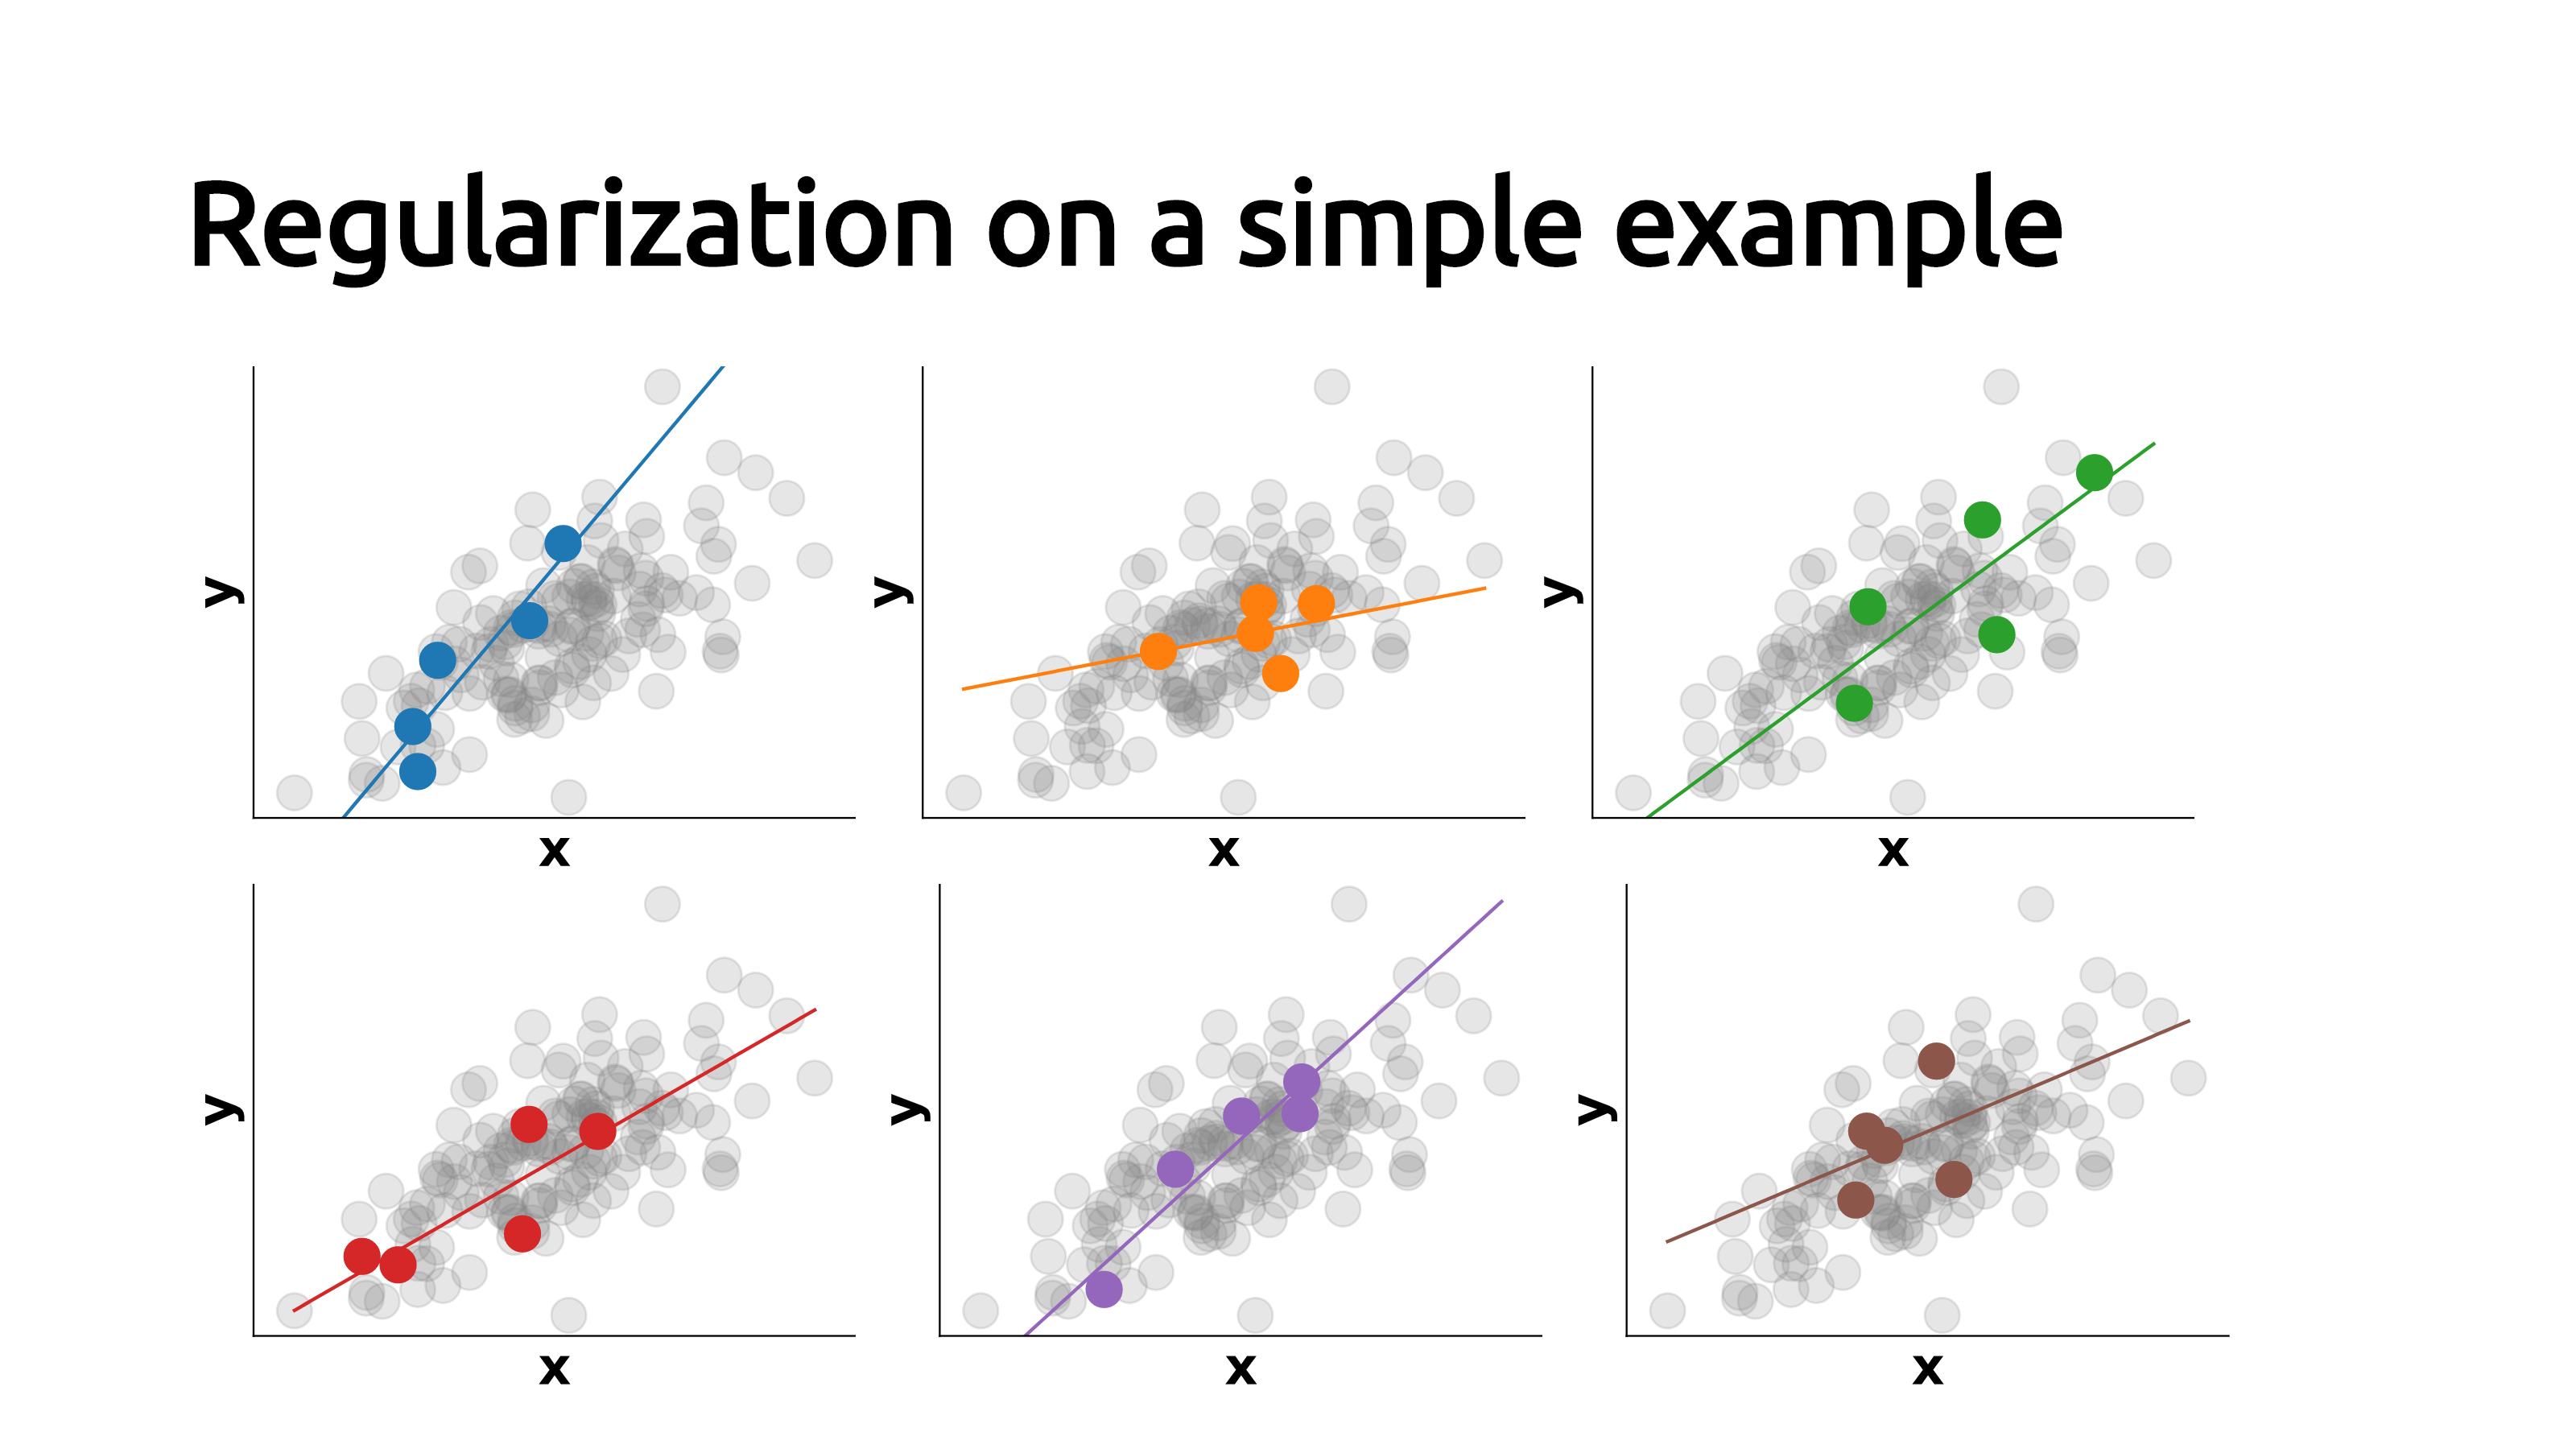

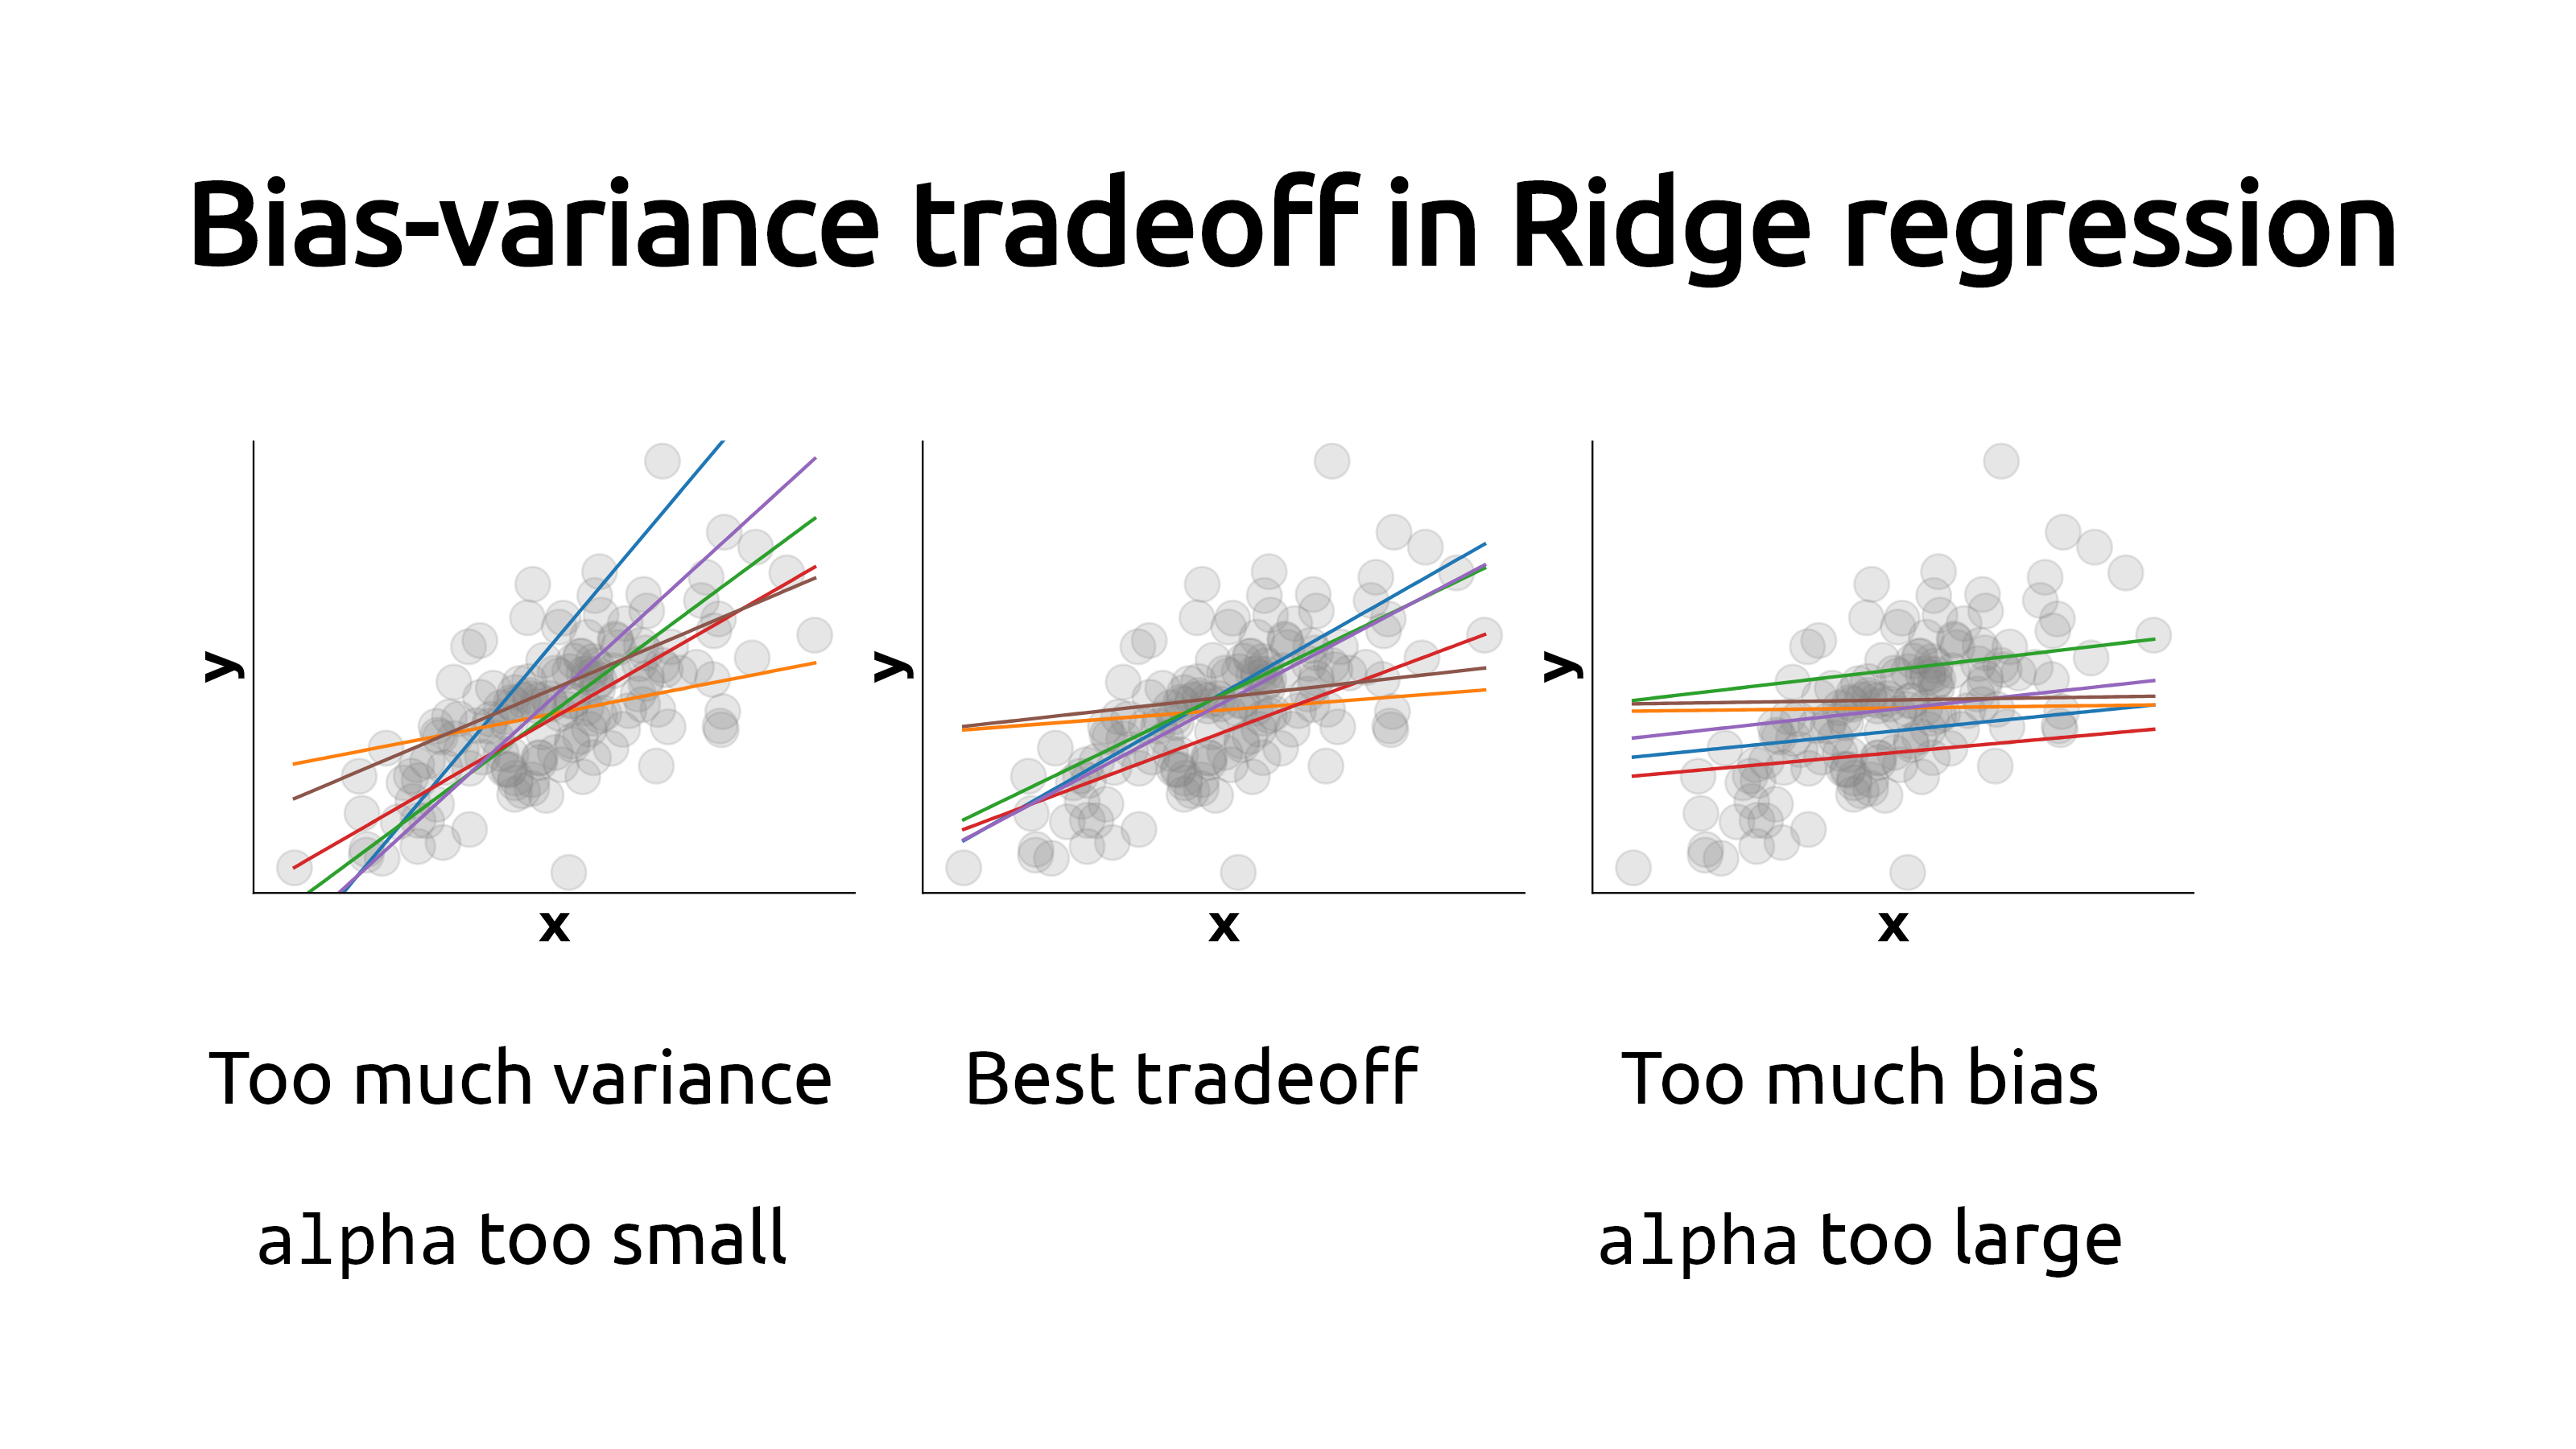

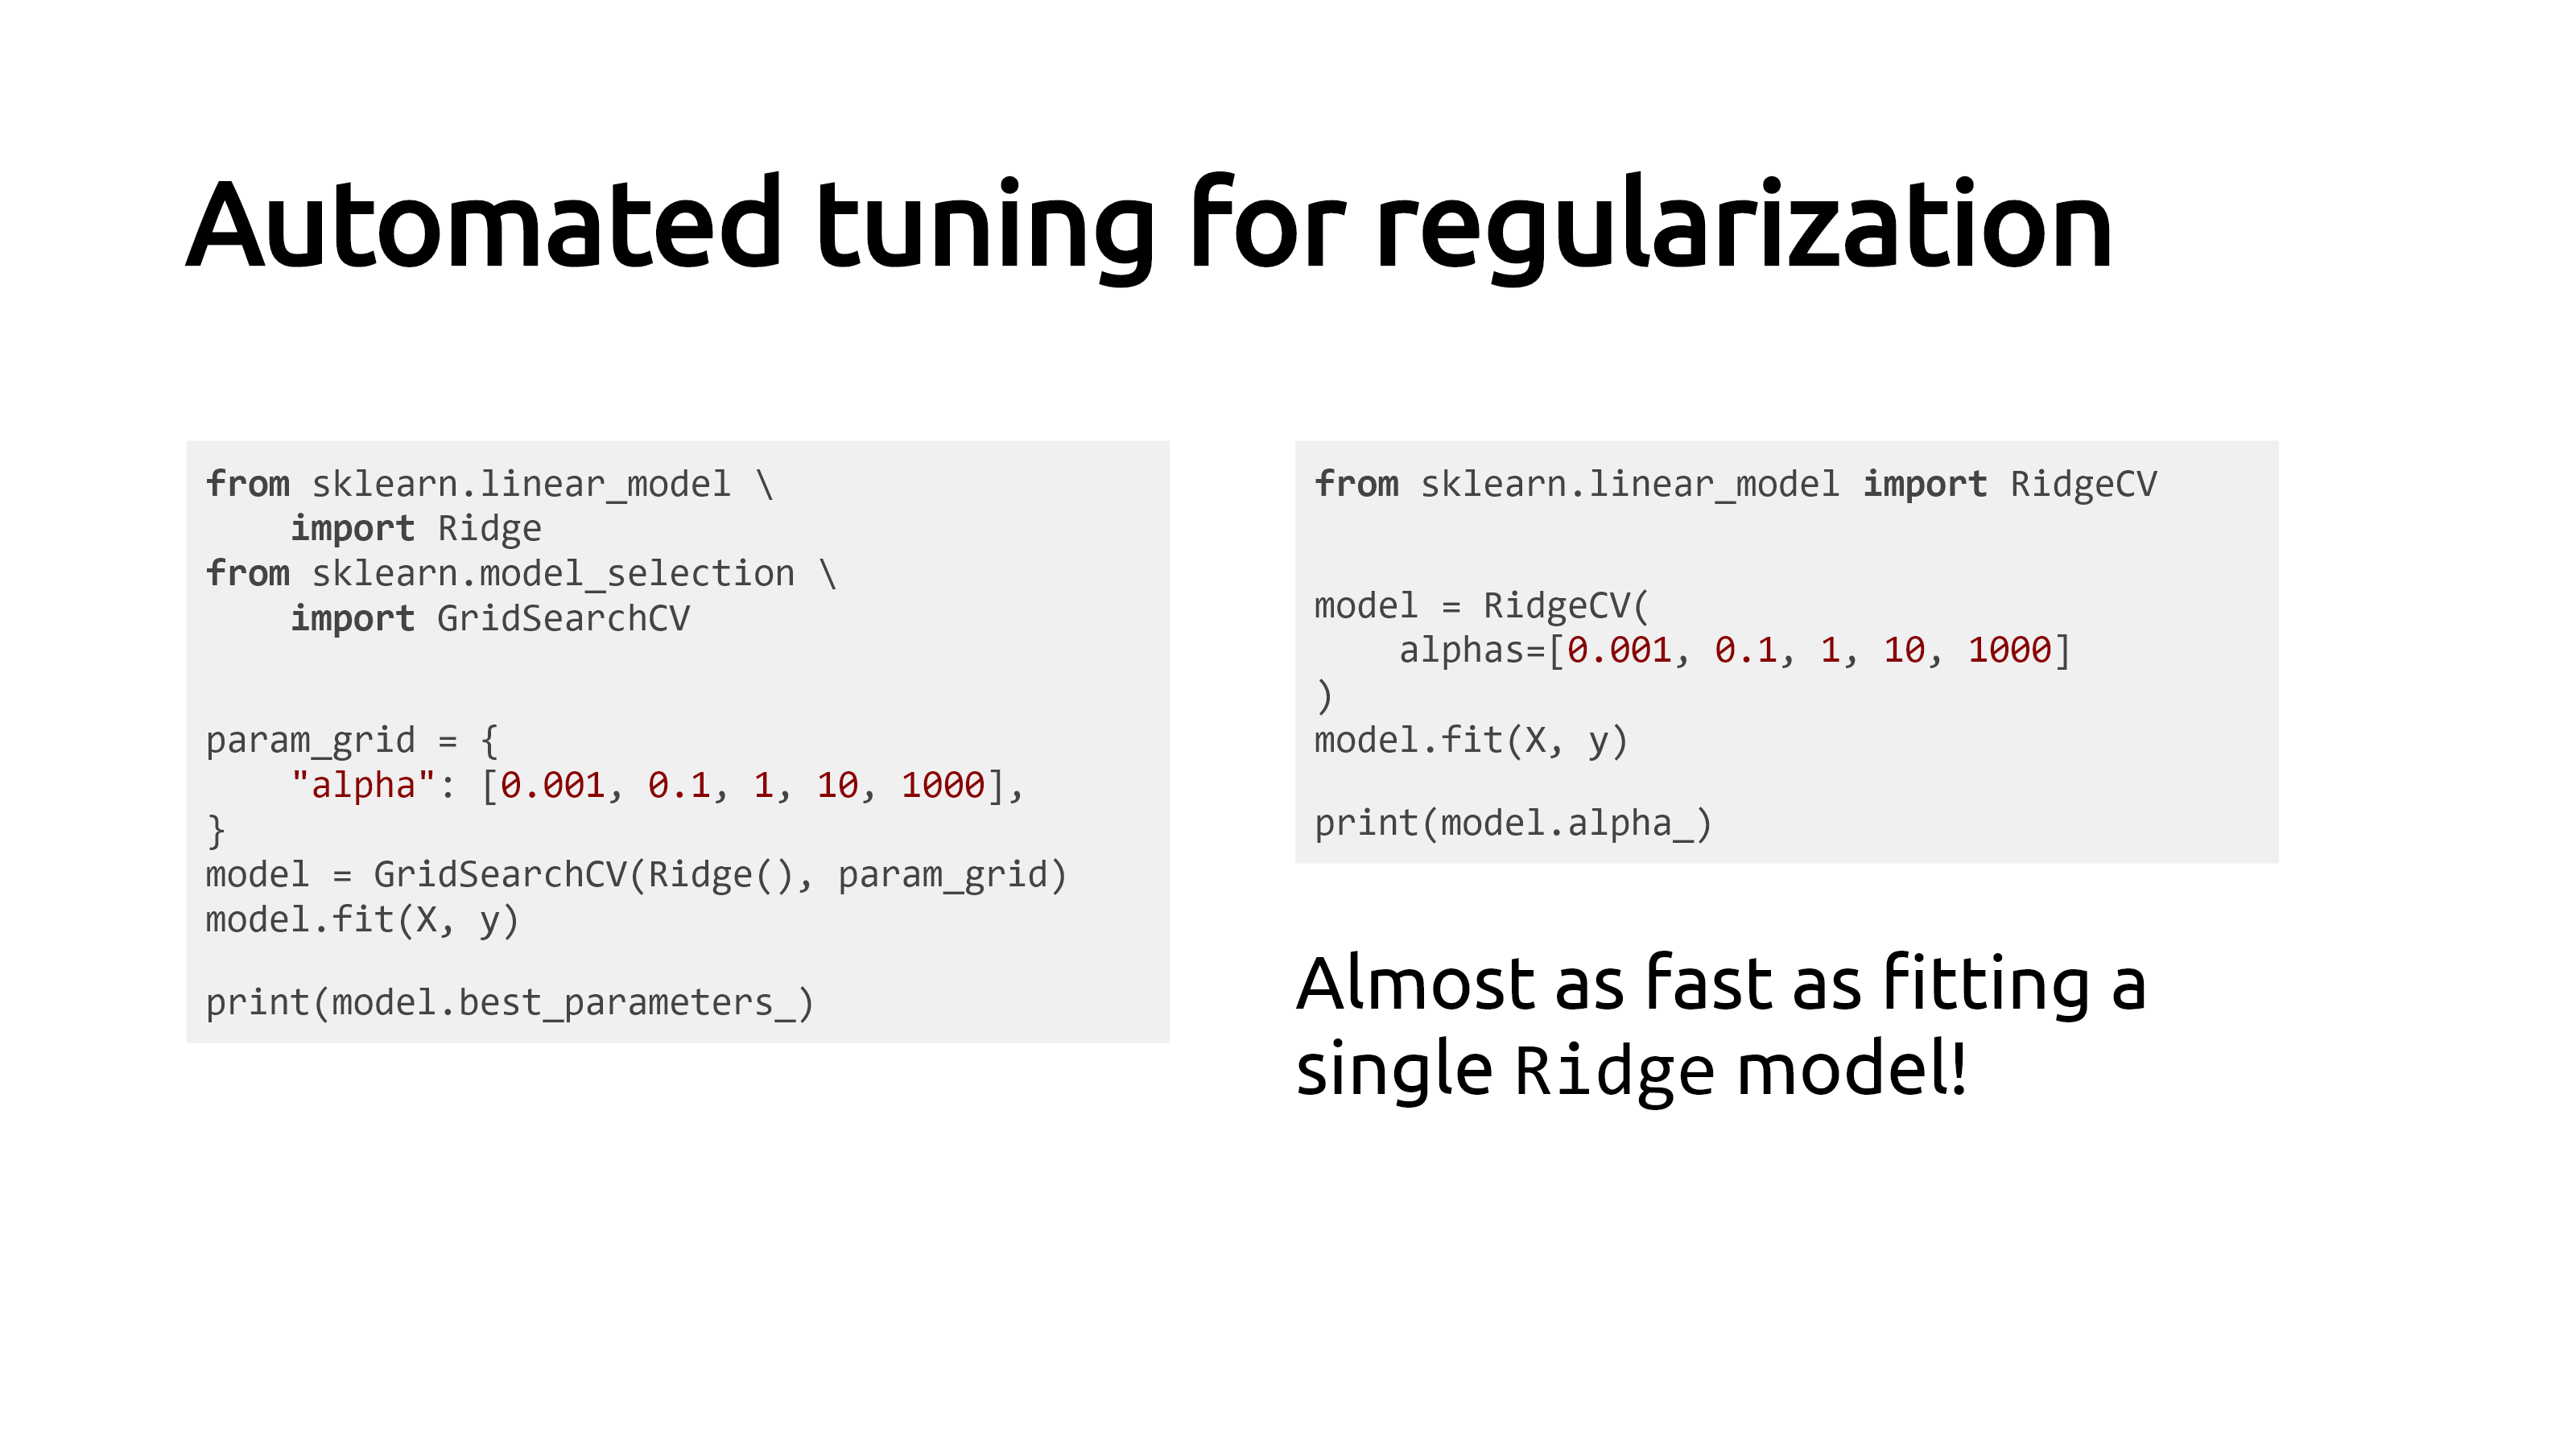

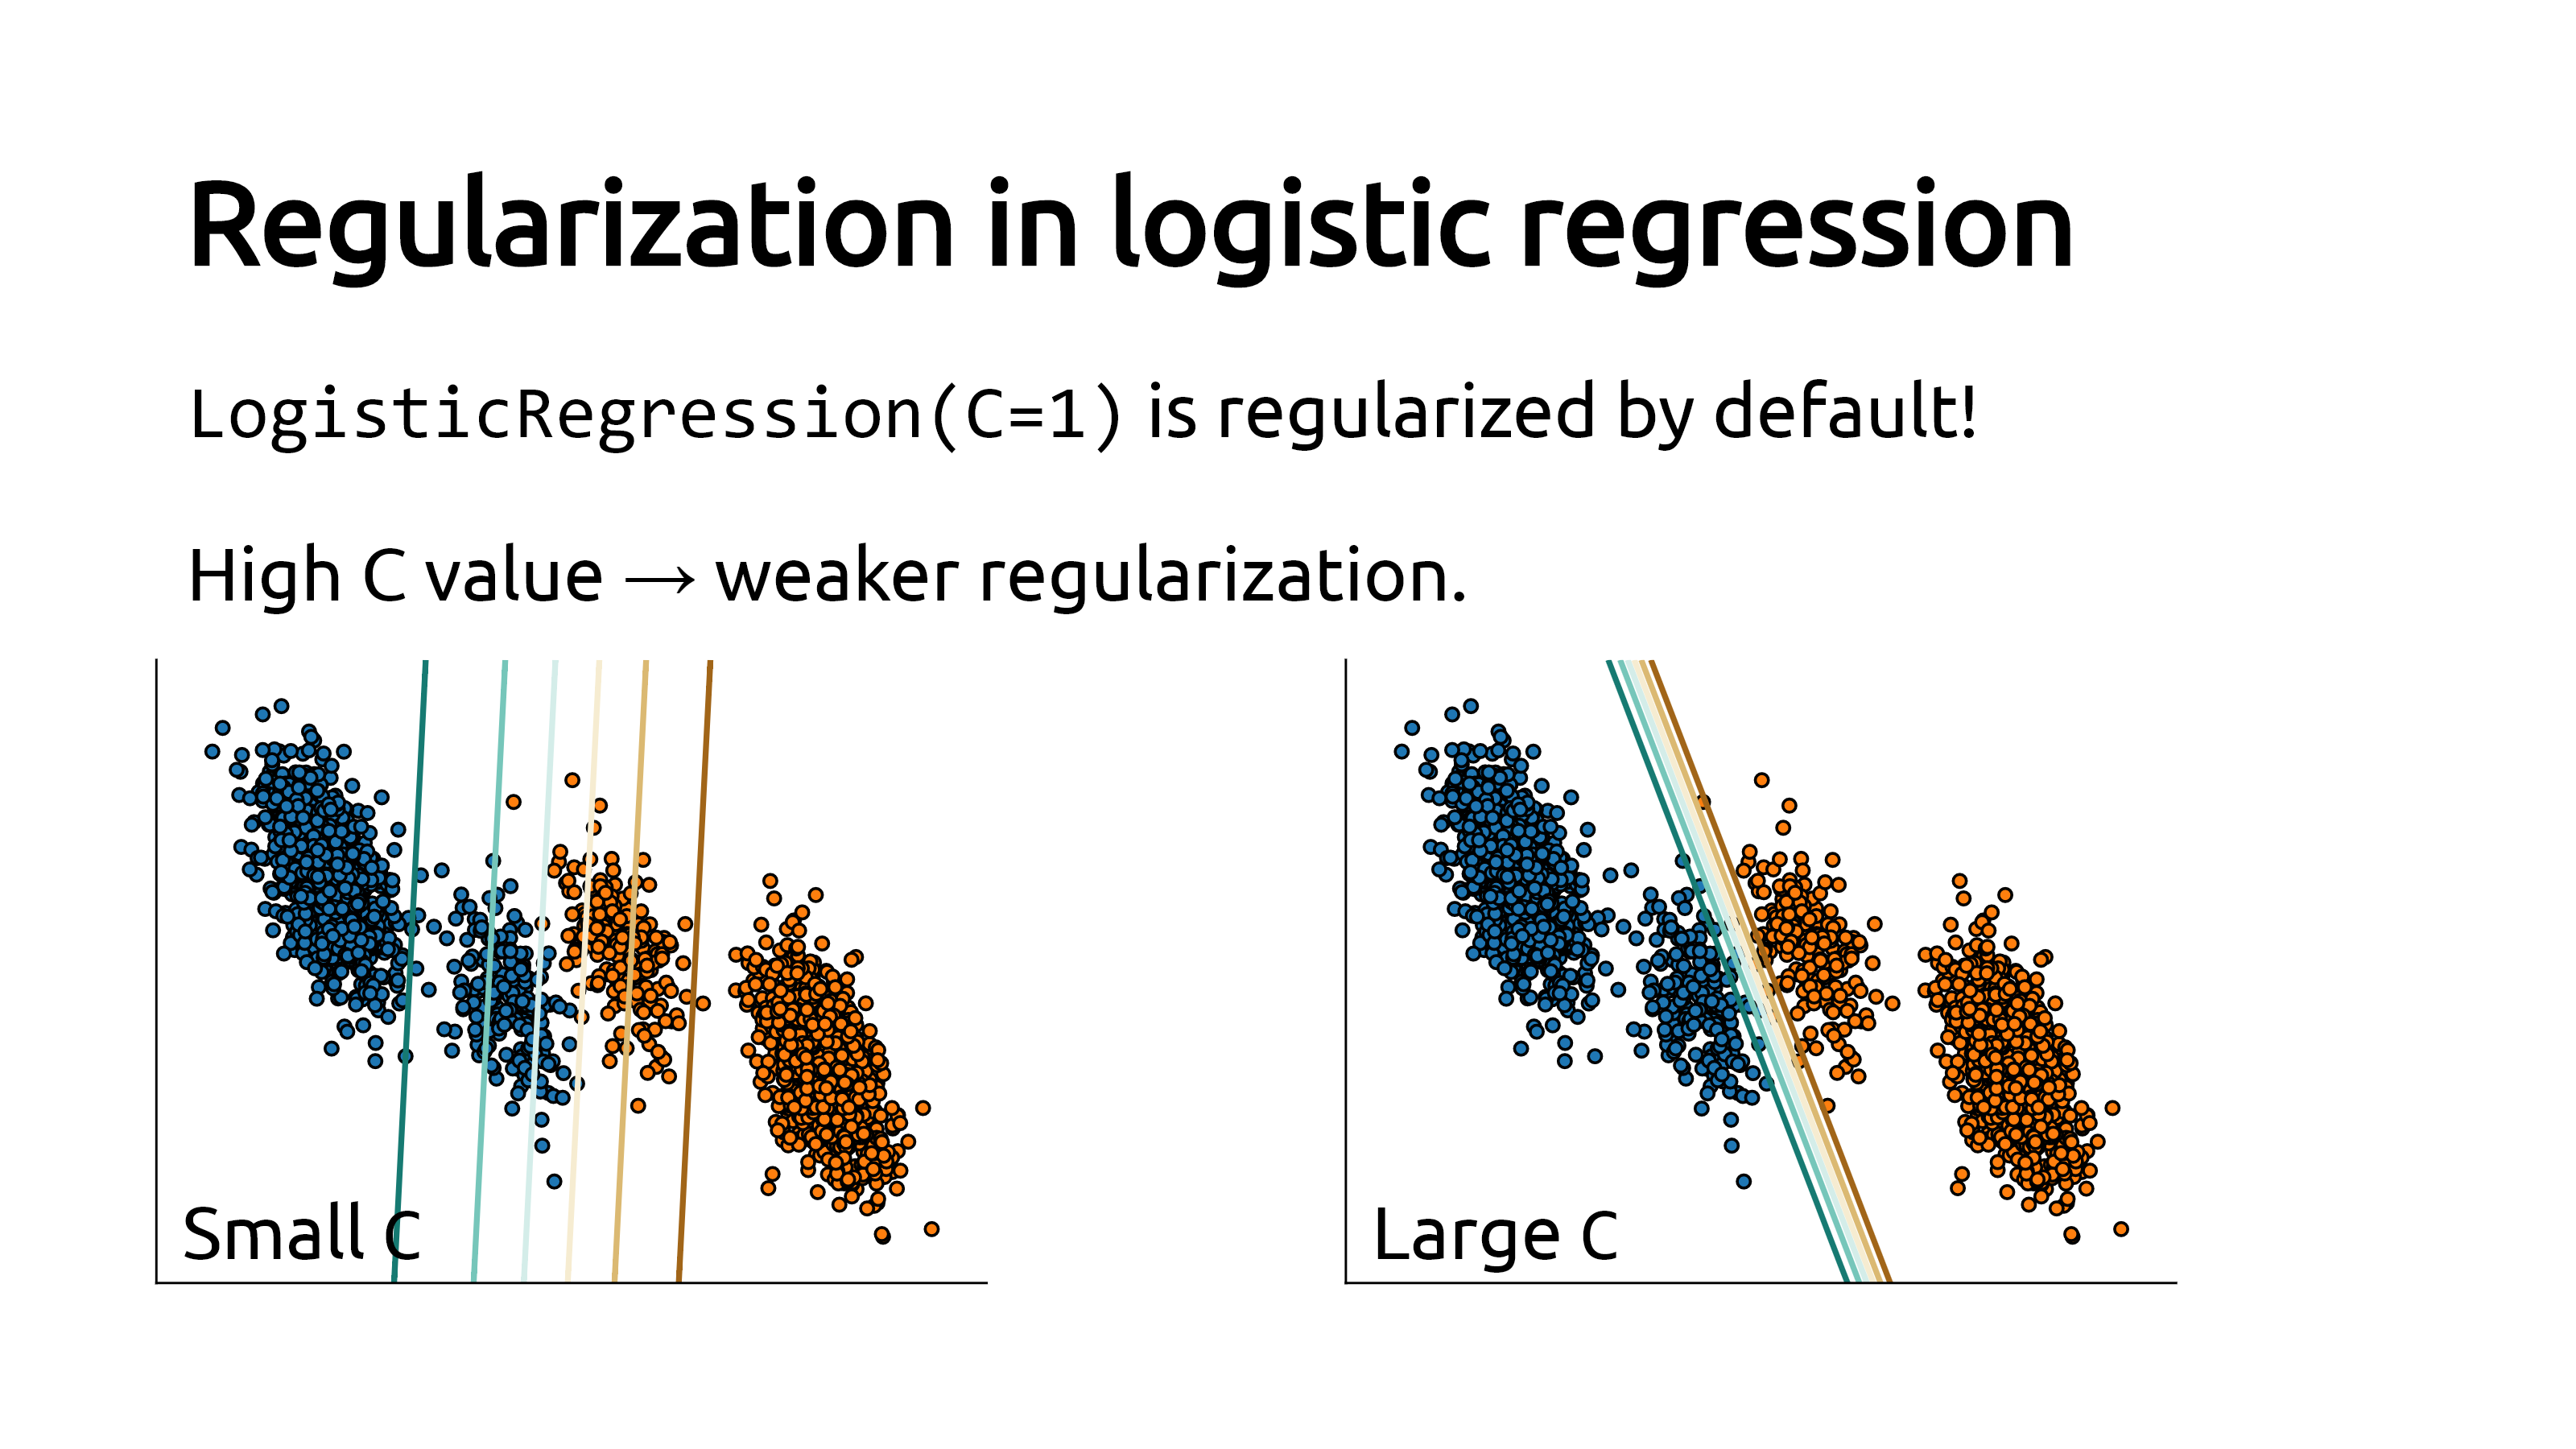

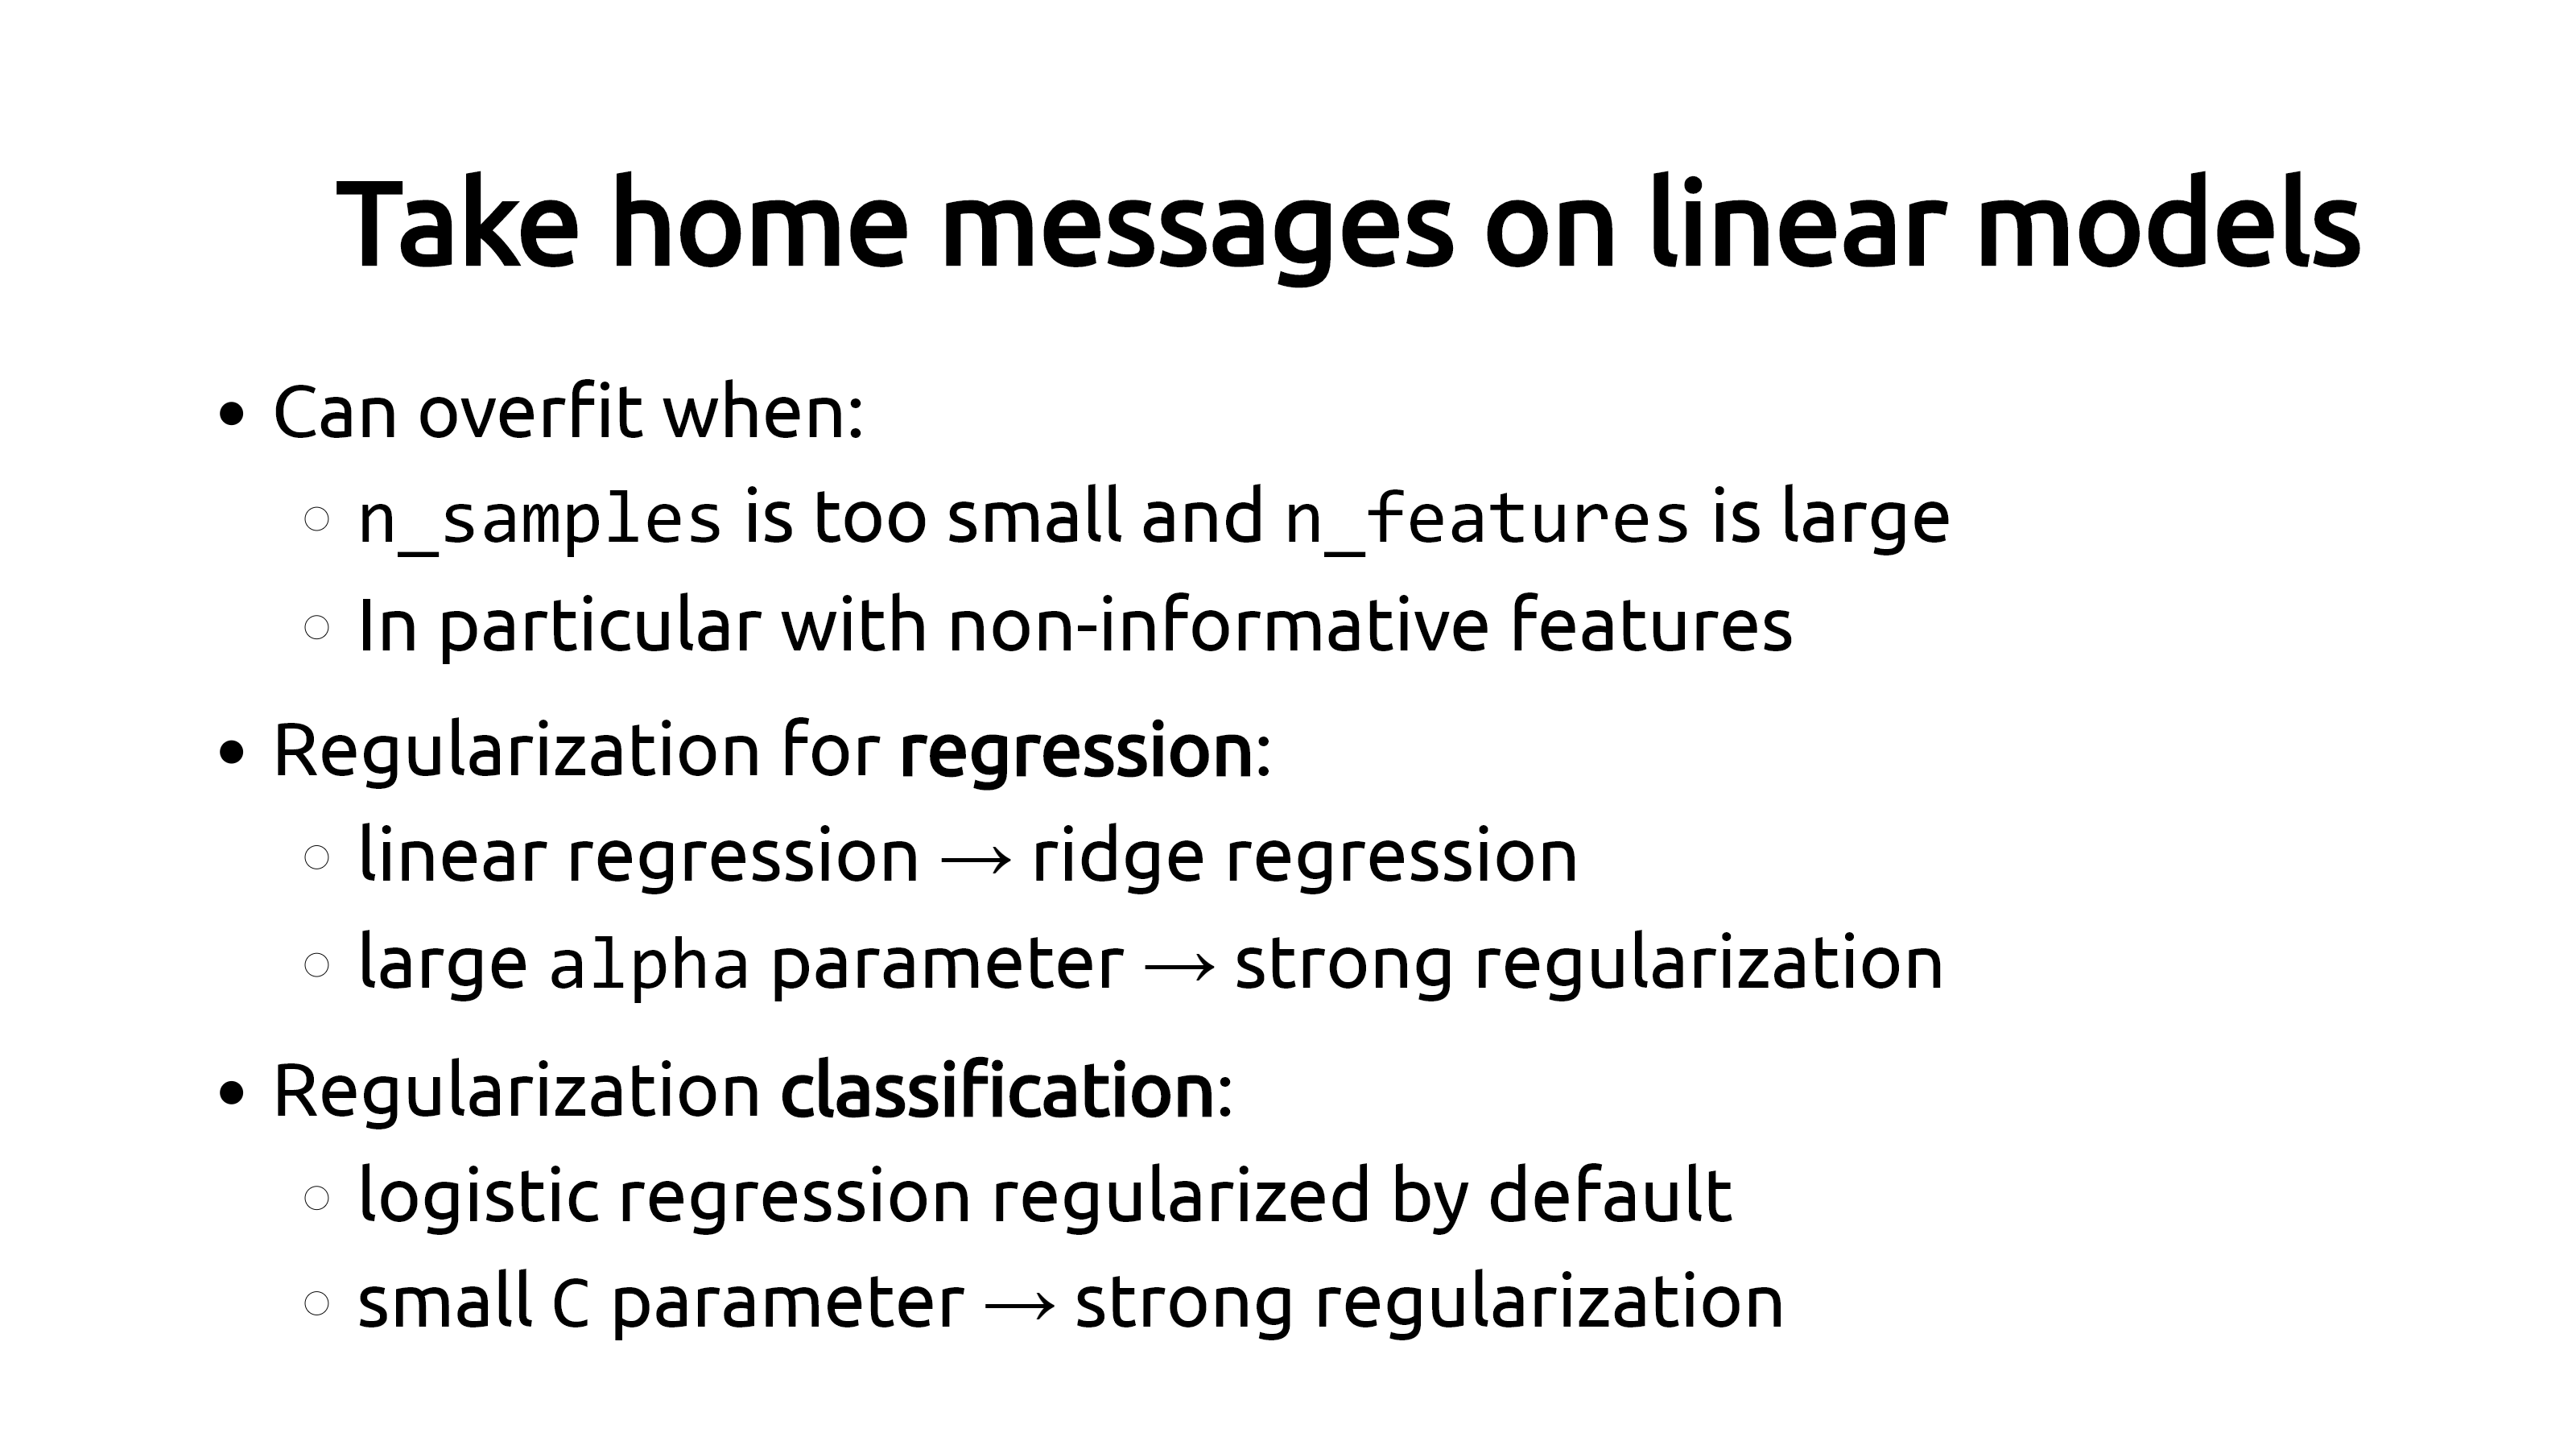

*ref: https://inria.github.io/scikit-learn-mooc/python_scripts/linear_models_regularization.html*

# Effect of regularization

In [2]:
# We will first load the California housing dataset.

from sklearn.datasets import fetch_california_housing

data, target = fetch_california_housing(as_frame=True, return_X_y=True)
target *= 100  # rescale the target in k$
data.head()

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25

In [3]:
# use the PolynomialFeatures transformer to create additional features
# encoding non-linear interactions between features.

from sklearn.model_selection import cross_validate
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

linear_regression = make_pipeline(PolynomialFeatures(degree=2),
                                  LinearRegression())
cv_results = cross_validate(linear_regression, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [4]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4190.212 ± 151.123


In [5]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
13334.943 ± 20292.681


⚠️The score on the training set is much better. This generalization performance gap between the training and testing score is an indication that our model overfitted our training set.

In [7]:
# Since we used a PolynomialFeatures to augment the data, we will create feature names 
# representative of the feature combination. 

model_first_fold = cv_results["estimator"][0]

In [9]:
# Now, we can access to the fitted PolynomialFeatures to generate the feature names

feature_names = model_first_fold[0].get_feature_names_out(
    input_features=data.columns)
feature_names

array(['1', 'MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population',
       'AveOccup', 'Latitude', 'Longitude', 'MedInc^2', 'MedInc HouseAge',
       'MedInc AveRooms', 'MedInc AveBedrms', 'MedInc Population',
       'MedInc AveOccup', 'MedInc Latitude', 'MedInc Longitude',
       'HouseAge^2', 'HouseAge AveRooms', 'HouseAge AveBedrms',
       'HouseAge Population', 'HouseAge AveOccup', 'HouseAge Latitude',
       'HouseAge Longitude', 'AveRooms^2', 'AveRooms AveBedrms',
       'AveRooms Population', 'AveRooms AveOccup', 'AveRooms Latitude',
       'AveRooms Longitude', 'AveBedrms^2', 'AveBedrms Population',
       'AveBedrms AveOccup', 'AveBedrms Latitude', 'AveBedrms Longitude',
       'Population^2', 'Population AveOccup', 'Population Latitude',
       'Population Longitude', 'AveOccup^2', 'AveOccup Latitude',
       'AveOccup Longitude', 'Latitude^2', 'Latitude Longitude',
       'Longitude^2'], dtype=object)

In [10]:
# Finally, we can create the dataframe containing all the information.

import pandas as pd

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_linear_regression = pd.DataFrame(coefs, columns=feature_names)

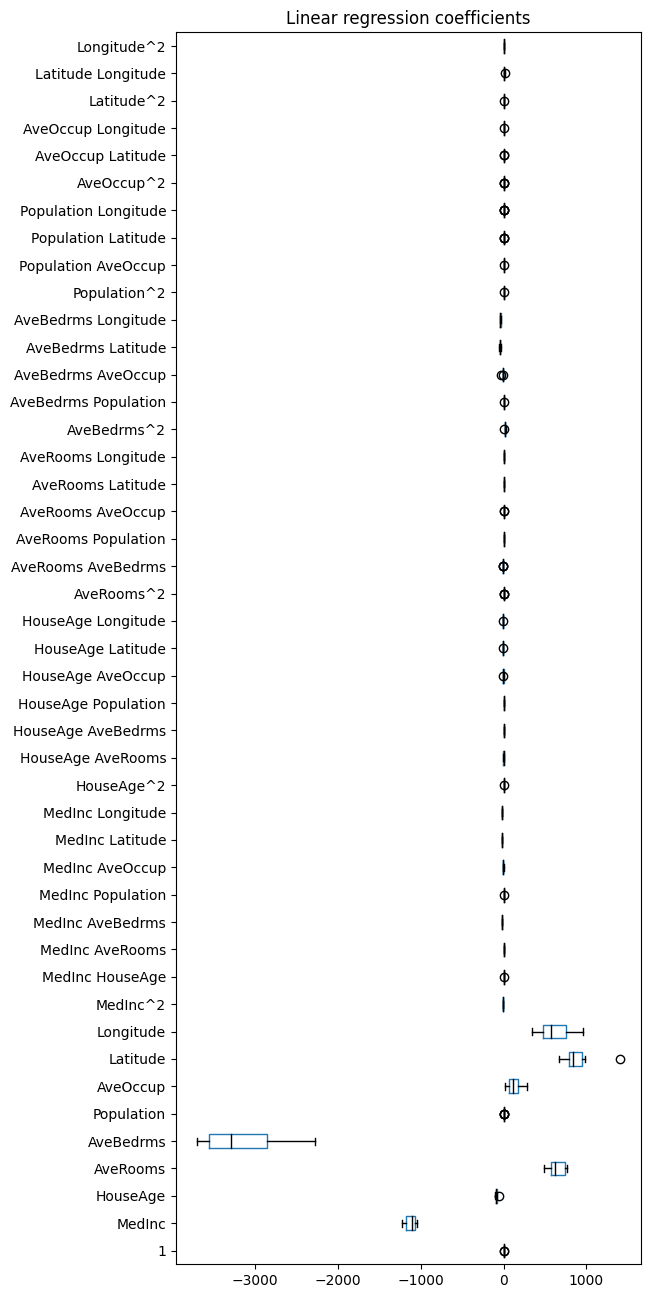

In [11]:
# Now, let’s use a box plot to see the coefficients variations.

import matplotlib.pyplot as plt

color = {"whiskers": "black", "medians": "black", "caps": "black"}
weights_linear_regression.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Linear regression coefficients")

In [13]:
# We can force the linear regression model to consider all features in a more homogeneous manner. 

from sklearn.linear_model import Ridge

ridge = make_pipeline(PolynomialFeatures(degree=2),
                      Ridge(alpha=100))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

C:\Users\ricardo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.672e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ricardo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.67257e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ricardo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.75536e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
C:\Users\ricardo\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=2.67367e-17): result may not be accurate.
  return linalg.sol

The code cell above will generate a couple of warnings because the features included both extremely large and extremely small values, which are causing numerical problems when training the predictive model.

In [16]:
# We can explore the train and test scores of this model.

train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4373.180 ± 153.942


In [18]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
7303.589 ± 4950.732


We see that the training and testing scores are much closer, indicating that our model is less overfitting.

In [20]:
# We can compare the values of the weights of ridge with the un-regularized linear regression.

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

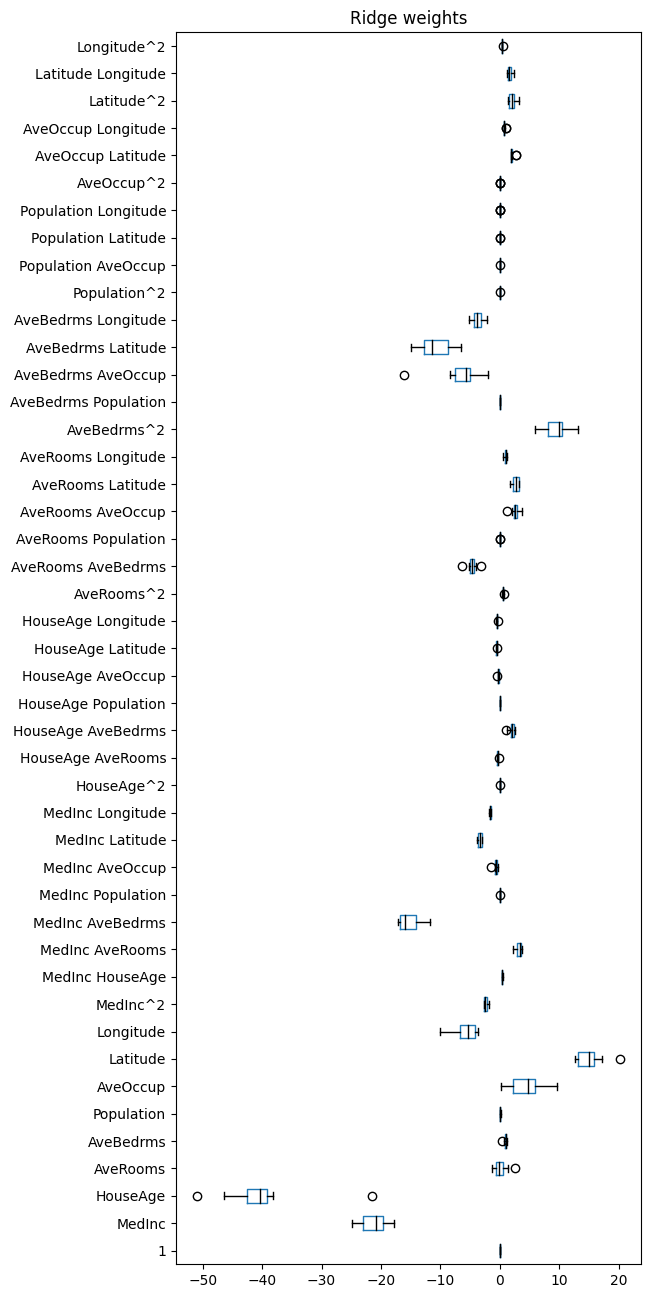

In [21]:
weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights")

By comparing the magnitude of the weights on this plot compared to the previous plot, we see that a ridge model will enforce all weights to have a similar magnitude, while the overall magnitude of the weights is shrunk towards zero with respect to the linear regression model.

# Feature scaling and regularization

On the one hand, **weights** define the link between feature values and the predicted target. 

On the other hand, **regularization** adds constraints on the weights of the model through the alpha parameter. 

Therefore, the effect that **feature rescaling** has on the final weights also interacts with regularization.

In [22]:
# We will add a StandardScaler in the machine learning pipeline. 
# This scaler will be placed just before the regressor.

from sklearn.preprocessing import StandardScaler

ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=0.5))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

In [23]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4347.036 ± 156.666


In [25]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
5508.472 ± 1816.642


We observe that scaling data has a positive impact on the test score and that the test score is closer to the train score. It means that our model is less overfitted and that we are getting closer to the best generalization sweet spot.

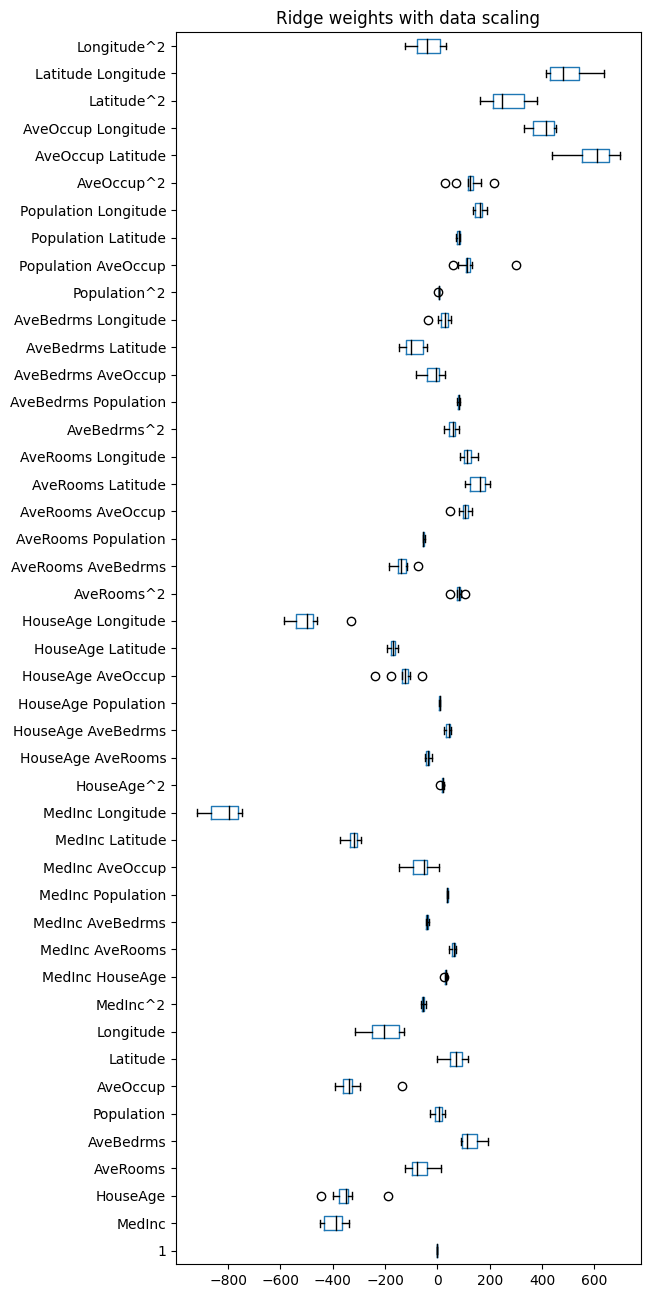

In [26]:
# Let’s have an additional look to the different weights.

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling")

Compare to the previous plots, we see that now all weight magnitudes are closer and that all features are more equally contributing.


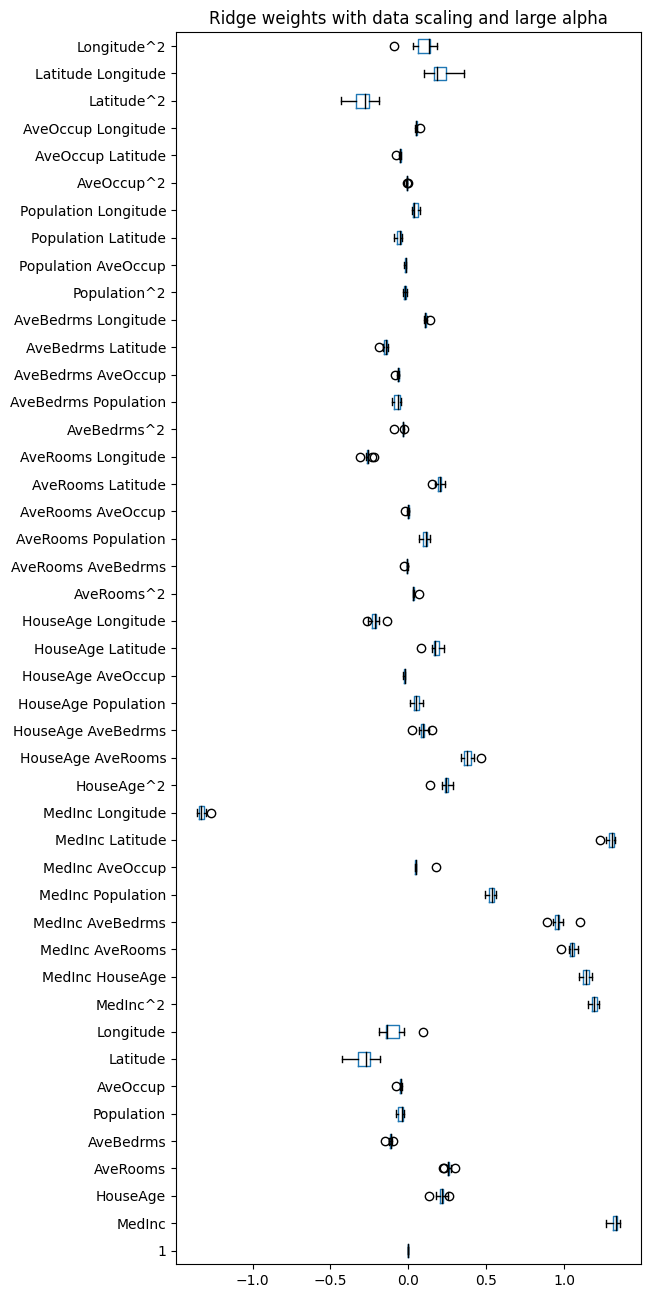

In [27]:
# In the previous example, we fixed alpha=0.5. We will now check the impact of the value of alpha by increasing its value.

ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      Ridge(alpha=1_000_000))
cv_results = cross_validate(ridge, data, target,
                            cv=10, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True)

coefs = [est[-1].coef_ for est in cv_results["estimator"]]
weights_ridge = pd.DataFrame(coefs, columns=feature_names)

weights_ridge.plot.box(color=color, vert=False, figsize=(6, 16))
_ = plt.title("Ridge weights with data scaling and large alpha")

Looking specifically to weights values, we observe that increasing the value of alpha will decrease the weight values. A negative value of alpha would actually enhance large weights and promote overfitting.

# Fine tuning the regularization parameter
As mentioned, the regularization parameter needs to be tuned on each dataset. 

The default parameter will not lead to the optimal model. Therefore, we need to tune the alpha parameter.

Therefore, we should include search of the hyperparameter alpha within the cross-validation. As we saw in previous notebooks, we could use a **grid-search**. 

However, some predictor in scikit-learn are available with an integrated hyperparameter search, more efficient than using a grid-search. The name of **these predictors finishes by CV**. In the case of Ridge, scikit-learn provides a RidgeCV regressor.

Therefore, we can use this predictor as the last step of the pipeline. Including the pipeline a cross-validation allows to make a nested cross-validation: the inner cross-validation will search for the best alpha, while the outer cross-validation will give an estimate of the testing score.

In [30]:
import numpy as np
from sklearn.linear_model import RidgeCV

alphas = np.logspace(-2, 0, num=20)
ridge = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(),
                      RidgeCV(alphas=alphas, store_cv_values=True))

In [31]:
from sklearn.model_selection import ShuffleSplit

cv = ShuffleSplit(n_splits=5, random_state=1)
cv_results = cross_validate(ridge, data, target,
                            cv=cv, scoring="neg_mean_squared_error",
                            return_train_score=True,
                            return_estimator=True, n_jobs=2)

In [32]:
train_error = -cv_results["train_score"]
print(f"Mean squared error of linear regression model on the train set:\n"
      f"{train_error.mean():.3f} ± {train_error.std():.3f}")

Mean squared error of linear regression model on the train set:
4306.562 ± 25.918


In [33]:
test_error = -cv_results["test_score"]
print(f"Mean squared error of linear regression model on the test set:\n"
      f"{test_error.mean():.3f} ± {test_error.std():.3f}")

Mean squared error of linear regression model on the test set:
4348.657 ± 252.921


When fitting the ridge regressor, we also requested to store the error found during cross-validation (by setting the parameter store_cv_values=True). We will plot the mean squared error for the different alphas regularization strength that we tried.

In [35]:
mse_alphas = [est[-1].cv_values_.mean(axis=0)
              for est in cv_results["estimator"]]
cv_alphas = pd.DataFrame(mse_alphas, columns=alphas)
cv_alphas

0.010000      0.012743      0.016238      0.020691      0.026367  \
0   7587.897141   7059.531216   6579.796667   6161.839629   5813.048345   
1   7079.341771   6696.622046   6329.022308   5987.727181   5681.306000   
2  24857.406605  21448.284772  18293.478416  15481.009011  13067.031991   
3   7504.216958   7125.074257   6754.172985   6400.999897   6072.937965   
4   6999.938808   6598.898743   6215.363499   5861.328579   5546.025773   

       0.033598     0.042813     0.054556     0.069519     0.088587  \
0   5535.350138  5326.646369  5182.950517  5100.749049  5079.212663   
1   5415.171818  5191.880969  5012.209177  4876.780585  4787.974274   
2  11071.457116  9480.437579  8254.431555  7338.963939  6675.026438   
3   5774.941819  5509.955509  5280.027720  5087.960263  4939.271829   
4   5275.377052  5052.349007  4878.140850  4753.964890  4683.117084   

      0.112884     0.143845     0.183298     0.233572     0.297635  \
0  5122.029454  5238.704149  5445.118890  5763.012259  6217.925433   
1  4751.851652  4779.853646  4889.937328  5106.656625  5459.549144   
2  6207.024331  5887.541169  5679.263698  5554.913823  5496.051755   
3  4844.228092  4819.618117  4889.808854  5086.420585  5445.877349   
4  4673.049960  4737.162496  4895.935124  5176.863333  5612.500529   

      0.379269     0.483293     0.615848     0.784760      1.000000  
0  6835.274126  7634.692137  8623.620241  9791.918443  11109.476019  
1  5979.280717  6691.530974  7609.581815  8727.609953  10017.092899  
2  5491.367683  5534.775517  5623.398006  5755.456140   5928.154410  
3  6004.320850  6790.113763  7815.311733  9068.542918  10511.939341  
4  6236.037942  7074.449338  8140.303978  9424.471281  10892.352852

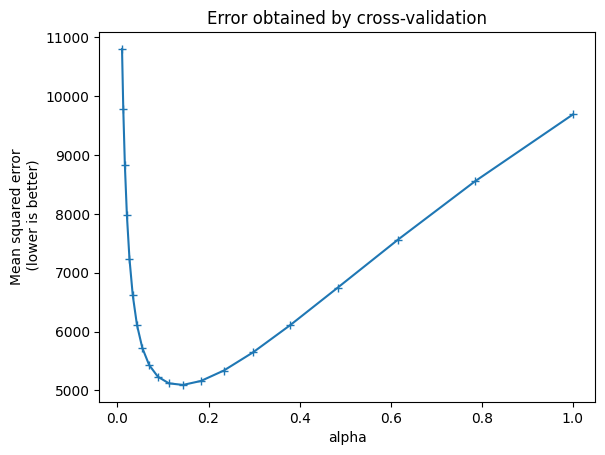

In [36]:
cv_alphas.mean(axis=0).plot(marker="+")
plt.ylabel("Mean squared error\n (lower is better)")
plt.xlabel("alpha")
_ = plt.title("Error obtained by cross-validation")

In [38]:
best_alphas = [est[-1].alpha_ for est in cv_results["estimator"]]
best_alphas

[0.08858667904100823,
 0.11288378916846889,
 0.37926901907322497,
 0.14384498882876628,
 0.11288378916846889]

The optimal regularization strength is not necessarily the same on all cross-validation iterations. 

But since we expect each cross-validation resampling to stem from the same data distribution, it is common **practice to use the average value of the best alpha** found on different cross-validation folds as our final estimate for the tuned alpha.

In [39]:
print(f"The mean optimal alpha leading to the best generalization performance is:\n"
      f"{np.mean(best_alphas):.2f} ± {np.std(best_alphas):.2f}")

The mean optimal alpha leading to the best generalization performance is:
0.17 ± 0.11
